# CITE-seq and flow cytometry comparisons

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
from ridgeplot import ridgeplot

import sklearn.mixture

import warnings

warnings.filterwarnings('ignore')

Sample used in this notebook is EG1. 

### Sample information:
- collected at diagnosis
- 65% of bonemarrow cells are blasts
- MLL (mixed lineage leukemia) 


In [64]:
#all CLR data

adata_prot_clr= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_clr.h5ad')

In [142]:
#all DSB data

adata_prot_dsb= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_dsb.h5ad')

In [78]:
#convert excel to csv (flow data)

read_file = pd.read_excel (r'/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.xlsx')
read_file.to_csv (r'/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.csv', index = None, header=True)

In [346]:
#get flow data

flow= pd.read_csv('/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.csv')

In [347]:
#checking which samples are available. Same are available from DSB data. 
adata_prot_clr.obs['EG_code'].unique().tolist()

['EG10',
 'EG11',
 'EG13',
 'EG16',
 'EG18',
 'EG1',
 'EG20',
 'EG2',
 'EG3',
 'EG4',
 'EG5',
 'EG6',
 'EG7',
 'EG8']

In [419]:
#picking EG1 sample

eg1_dsb=adata_prot_dsb[adata_prot_dsb.obs['EG_code'] == 'EG1']

In [414]:
#picking EG3 sample (same donor as EG1, sample divided)

eg3_clr=adata_prot_clr[adata_prot_clr.obs['EG_code'] == 'EG3']

In [423]:
eg1_dsb

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAAGTAGCATGACATC-1,1.176484,2.693837,0.258264,4.707983,11.006938,2.928922,0.405697,0.849043,0.683217,5.253935,...,7.661901,2.557992,0.457797,1.137315,2.542997,12.779661,4.326292,1.150996,1.145735,3.207012
AACCATGGTTAAAGAC-1,2.467758,1.108225,1.898602,4.096267,10.278395,1.619278,1.735687,0.849043,1.120610,9.399920,...,9.173957,2.084105,1.899191,0.550096,0.452547,11.225624,0.864827,-0.075617,-0.956887,2.362377
AACTCAGAGTACGCCC-1,0.411633,1.431538,1.263420,2.602167,10.517222,0.625076,-0.363744,1.346730,1.918856,10.675239,...,13.836331,2.405155,-1.247011,1.137315,-0.362592,14.149735,1.131227,3.580989,-0.956887,1.387317
AAGGCAGGTCCGAGTC-1,-0.462832,0.757364,-0.030115,1.655265,12.204256,-0.319069,1.735687,0.849043,1.918856,6.706405,...,14.474545,-0.211795,0.457797,1.684003,0.452547,15.826740,0.287159,2.213536,-0.956887,1.387317
AAGTCTGTCATCTGTT-1,-0.462832,-0.278082,-0.337112,1.388869,7.663535,3.013052,0.226675,3.773908,0.683217,9.676459,...,10.896624,0.173529,0.457797,-0.084149,-1.255475,11.191612,1.131227,1.699988,0.142277,-0.202339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCGTGGTCG-1,-1.483671,-0.162015,-0.665297,1.388869,9.728843,0.625076,-0.363744,1.812285,1.120610,5.750261,...,16.979069,1.369615,-0.355808,-0.084149,-0.362592,11.899754,0.864827,-0.075617,0.142277,-0.202339
TTGACTTCATCGGAAG-1,0.411633,-0.520512,-1.812457,4.561675,8.419900,1.870074,-0.581490,0.314457,1.918856,11.413830,...,14.798421,-0.347409,0.457797,-0.084149,0.452547,13.441594,1.857103,-0.075617,-0.956887,1.025769
TTGTAGGGTCCGTGAC-1,-0.462832,0.936528,0.530156,1.655265,7.205611,-1.004241,-1.055841,1.346730,-2.064723,5.816694,...,14.745527,0.173529,-0.355808,1.684003,1.896659,13.123051,-0.027704,0.561301,1.145735,-1.177399
TTTACTGCATTCTCAT-1,-2.066095,0.167771,1.263420,-0.997749,7.414841,-0.854428,3.451666,4.430142,1.120610,0.975356,...,-0.278954,-0.778799,1.206241,15.521364,0.452547,13.155962,0.287159,2.213536,3.719136,7.183194


### Note: low number of cells, not very representative sample!

In [409]:
eg1_clr

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAAGTAGCATGACATC-1,0.356789,1.568066,0.356789,0.952600,2.517058,1.568066,0.585685,0.219128,0.267152,1.355486,...,1.105646,1.460330,0.115554,0.219128,0.267152,3.137631,0.975951,0.219128,0.115554,0.619215
AACCATGGTTAAAGAC-1,0.555693,1.290554,0.665686,0.910795,2.451587,1.252672,0.910795,0.239203,0.340289,2.347392,...,1.379419,1.445231,0.239203,0.184550,0.126737,2.884227,0.475010,0.126737,0.000000,0.555693
AACTCAGAGTACGCCC-1,0.299261,1.386347,0.569564,0.681486,2.532284,0.983776,0.487322,0.299261,0.443518,2.666970,...,2.067807,1.532160,0.000000,0.246148,0.067446,3.570583,0.529288,0.487322,0.000000,0.443518
AAGGCAGGTCCGAGTC-1,0.215060,1.334804,0.391955,0.587668,3.025037,0.788312,1.015060,0.277567,0.494592,1.886843,...,2.282142,1.124749,0.148383,0.336396,0.148383,4.082684,0.444590,0.391955,0.000000,0.494592
AAGTCTGTCATCTGTT-1,0.270912,1.278988,0.417789,0.659322,2.273413,2.033147,0.808546,0.761236,0.417789,2.806870,...,1.977299,1.388263,0.188503,0.188503,0.000000,3.285509,0.711577,0.417789,0.098686,0.347045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCGTGGTCG-1,0.091278,1.248439,0.323743,0.620661,2.652472,1.192027,0.620661,0.453263,0.453263,1.818230,...,2.819564,1.573379,0.091278,0.174916,0.091278,3.367395,0.620661,0.174916,0.091278,0.323743
TTGACTTCATCGGAAG-1,0.347330,1.068257,0.079787,1.123765,2.239509,1.482813,0.509497,0.222479,0.509497,3.000870,...,2.364110,1.123765,0.153676,0.153676,0.153676,3.580286,0.732241,0.153676,0.000000,0.458308
TTGTAGGGTCCGTGAC-1,0.268483,1.568285,0.599539,0.706358,2.163264,0.706358,0.479928,0.414292,0.000000,1.894058,...,2.549904,1.380561,0.097725,0.414292,0.344043,3.714482,0.479928,0.268483,0.186745,0.186745
TTTACTGCATTCTCAT-1,0.000000,1.446543,0.802966,0.202147,2.287379,0.802966,1.680556,0.898607,0.514070,0.802966,...,0.289711,1.242512,0.289711,2.252665,0.202147,3.807139,0.578912,0.514070,0.444730,1.593407


In [413]:
#saving csv file of eg1 sample only

#e1_csv = eg1_clr.to_csv(r'/Users/tiinatuononen/Desktop/Thesis/Project/data/eg1_clr.csv', index = None, header=True)

In [385]:
#For these samples we have interesting flow data: 
#EG5,EG7
#EG6,EG8
#EG1,EG3

#EG5, EG7

#Checking what king of values we have

flow[flow['EG_code'] == 'EG5,EG7'].dropna(axis=1)


,EG_code,CD13,CD15,CD22,CD33,CD34,CD38,CD117,CD123,CD133,CD135,HLA-DR
9,"EG5,EG7",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [386]:
#Checking what king of values we have

flow[flow['EG_code'] == 'EG1,EG3'].dropna(axis=1)

,EG_code,CD2,CD3,CD4,CD7,CD11a,CD13,CD14,CD15,CD33,CD34,CD36,CD38,CD99,CD117,CD133,HLA-DR,MPO
11,"EG1,EG3",0.87,0.03,0.0,0.64,0.99,0.98,0.01,0.91,0.2,0.99,0.06,0.99,1.0,0.99,0.59,0.93,0.49


In [388]:
#drop EG_code
eg1_nonulls=eg1_nonulls.drop("EG_code", axis=1)

In [382]:
eg1_nonulls

,CD2,CD3,CD4,CD7,CD11a,CD13,CD14,CD15,CD33,CD34,CD36,CD38,CD99,CD117,CD133,HLA-DR,MPO
11,0.87,0.03,0.0,0.64,0.99,0.98,0.01,0.91,0.2,0.99,0.06,0.99,1.0,0.99,0.59,0.93,0.49


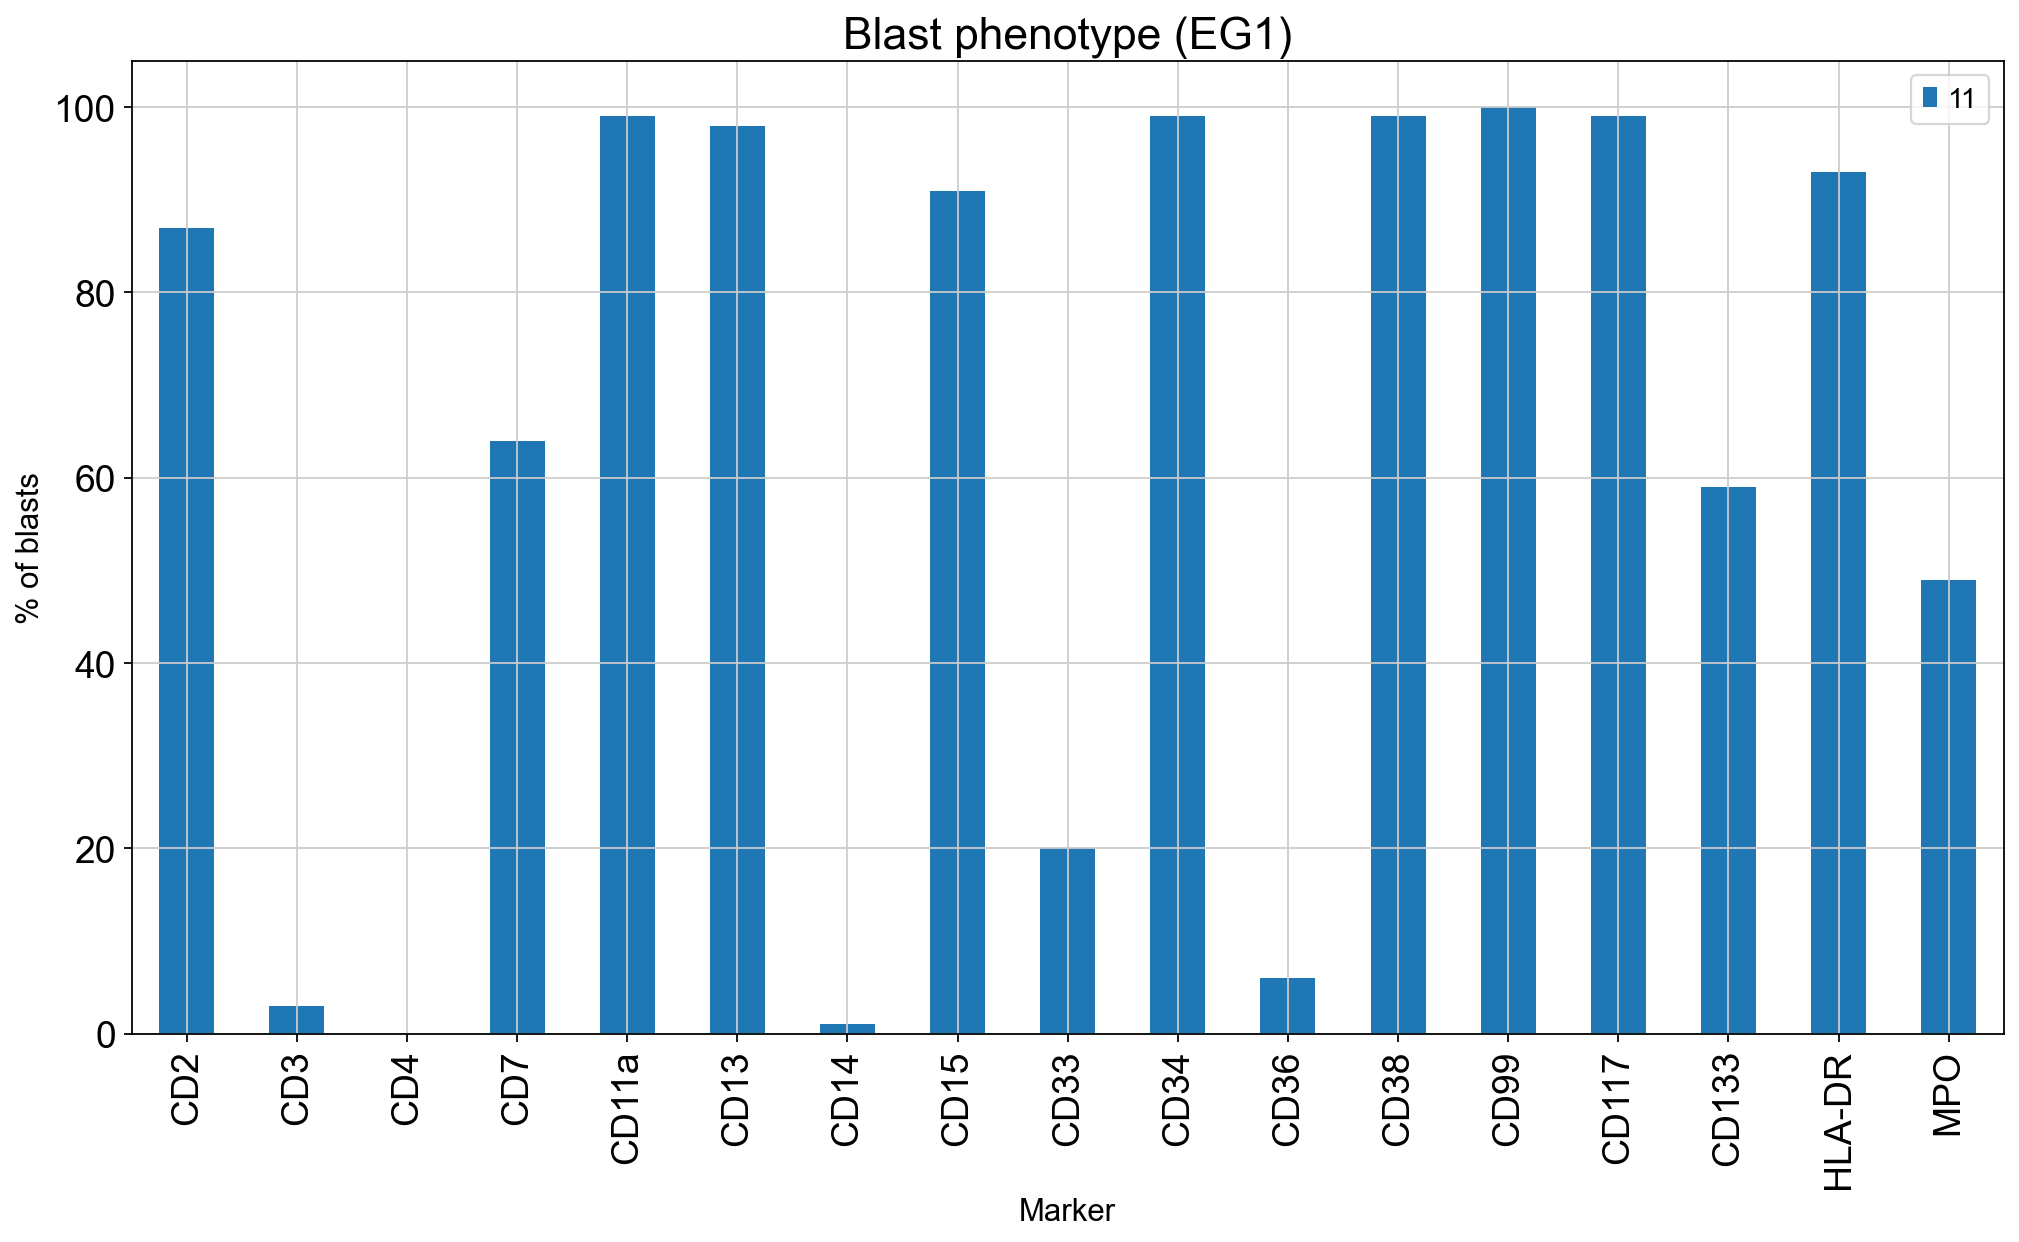

In [389]:
df=eg1_nonulls * 100 #multiplied by 100 to get percentages

df1=df.T

df1.plot.bar(xlabel="Marker", ylabel="% of blasts",
            figsize= (15,8),
           fontsize="large") ;

plt.title('Blast phenotype (EG1)', fontsize=20) ;

In [390]:
#CLR normalized EG1
eg1_clr=adata_prot_clr[adata_prot_clr.obs['EG_code'] == 'EG1']
eg1_clr=eg1_clr.to_df()

In [391]:
#DSB normalized EG1
eg1_dsb=adata_prot_dsb[adata_prot_dsb.obs['EG_code'] == 'EG1']
eg1_dsb=eg1_dsb.to_df()

In [392]:
#Selecting only markers for which we have % flow data

flow_markers=eg1_nonulls.columns
flow_markers

Index(['CD2', 'CD3', 'CD4', 'CD7', 'CD11a', 'CD13', 'CD14', 'CD15', 'CD33',
       'CD34', 'CD36', 'CD38', 'CD99', 'CD117', 'CD133', 'HLA-DR', 'MPO'],
      dtype='object')

In [424]:
#Select the markers that exist in flow-data and cite-seq data

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in eg1_dsb.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)


CD2 Yes
CD3 Yes
CD4 Yes
CD7 Yes
CD11a No
CD13 Yes
CD14 Yes
CD15 Yes
CD33 Yes
CD34 Yes
CD36 No
CD38 Yes
CD99 No
CD117 Yes
CD133 No
HLA-DR No
MPO No
['CD2', 'CD3', 'CD4', 'CD7', 'CD13', 'CD14', 'CD15', 'CD33', 'CD34', 'CD38', 'CD117']


### Note: From flow cytometry we have information about blast phenotype, so percentages are % from blasts. From cite-seq we have % from all cells (not only blasts). So, in the code below, the flow results are not actually comparable to cite-seq. 

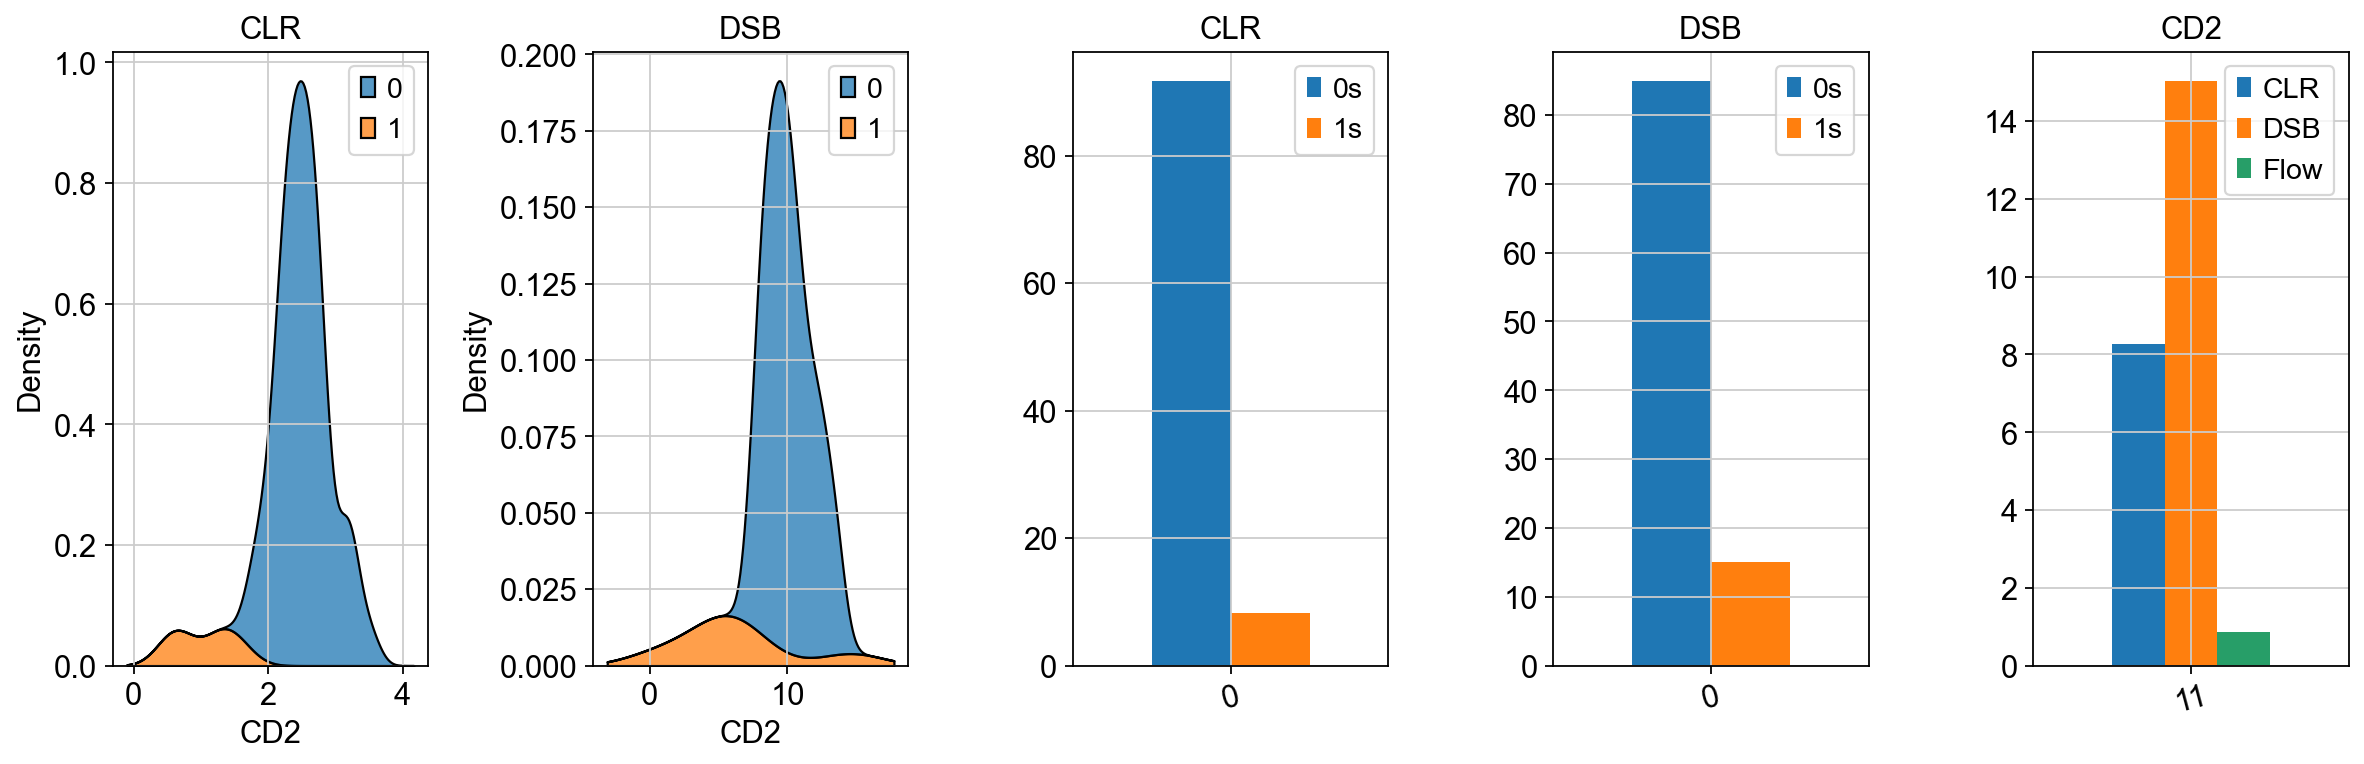

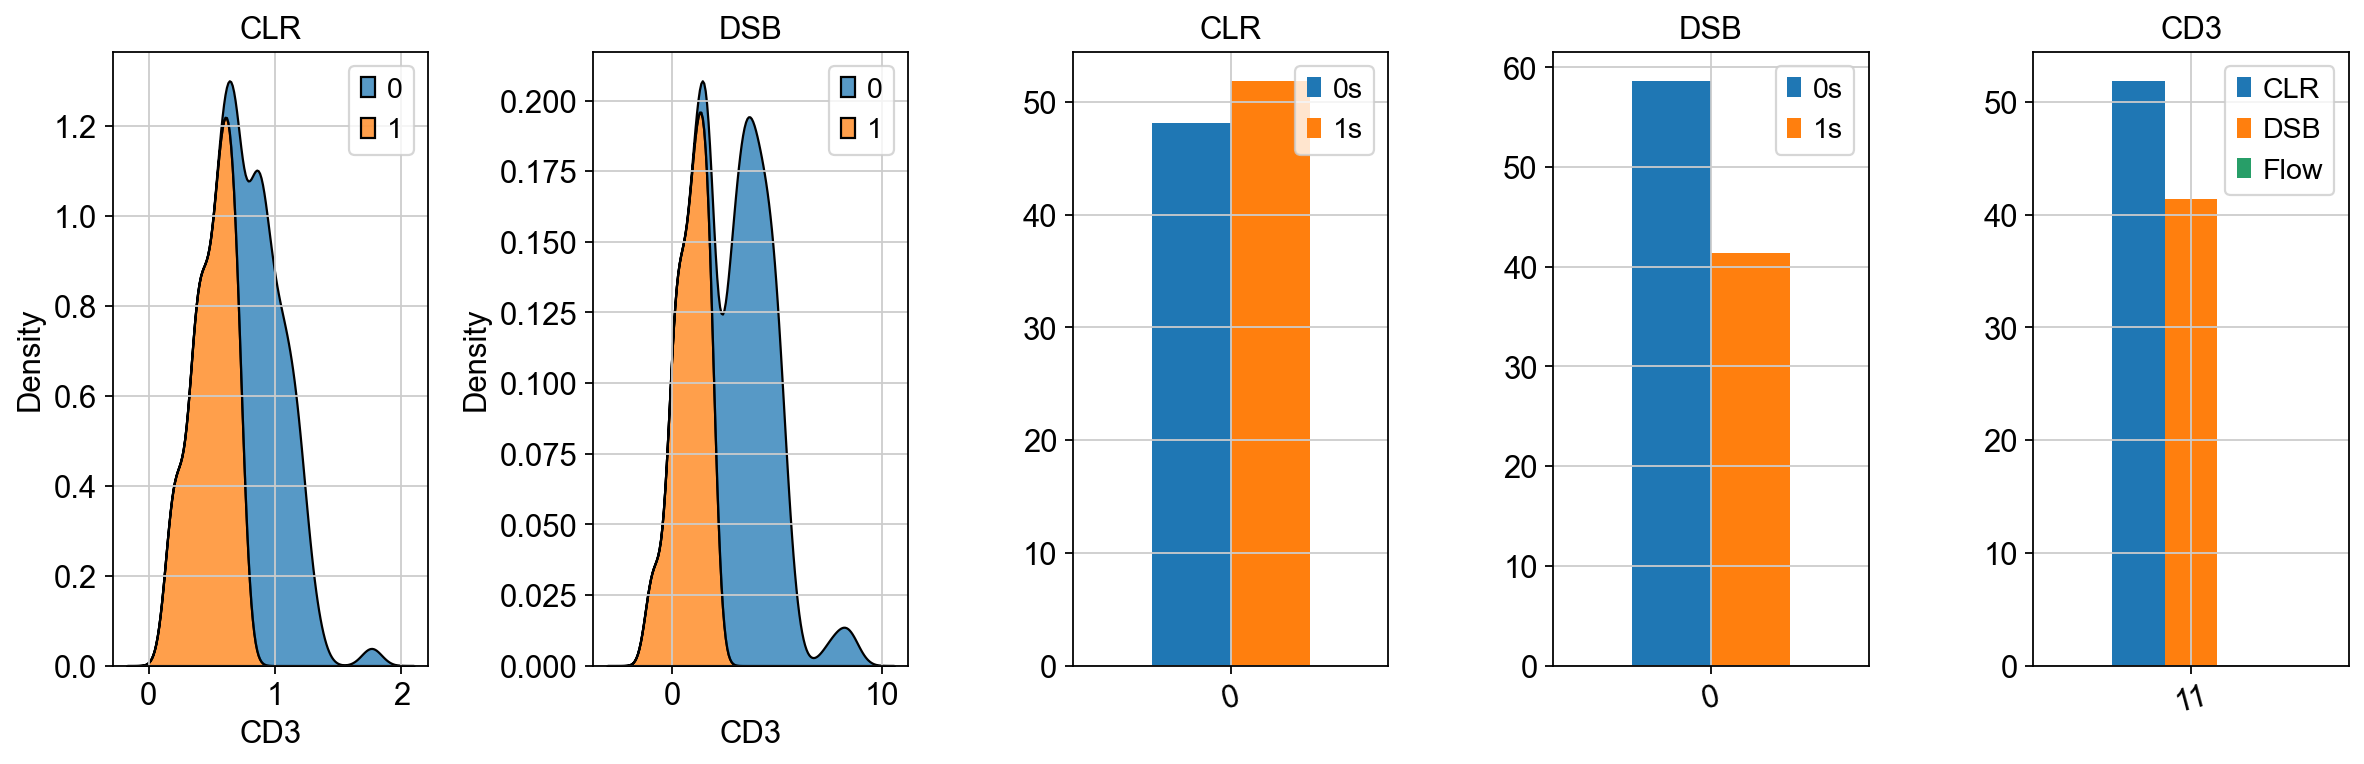

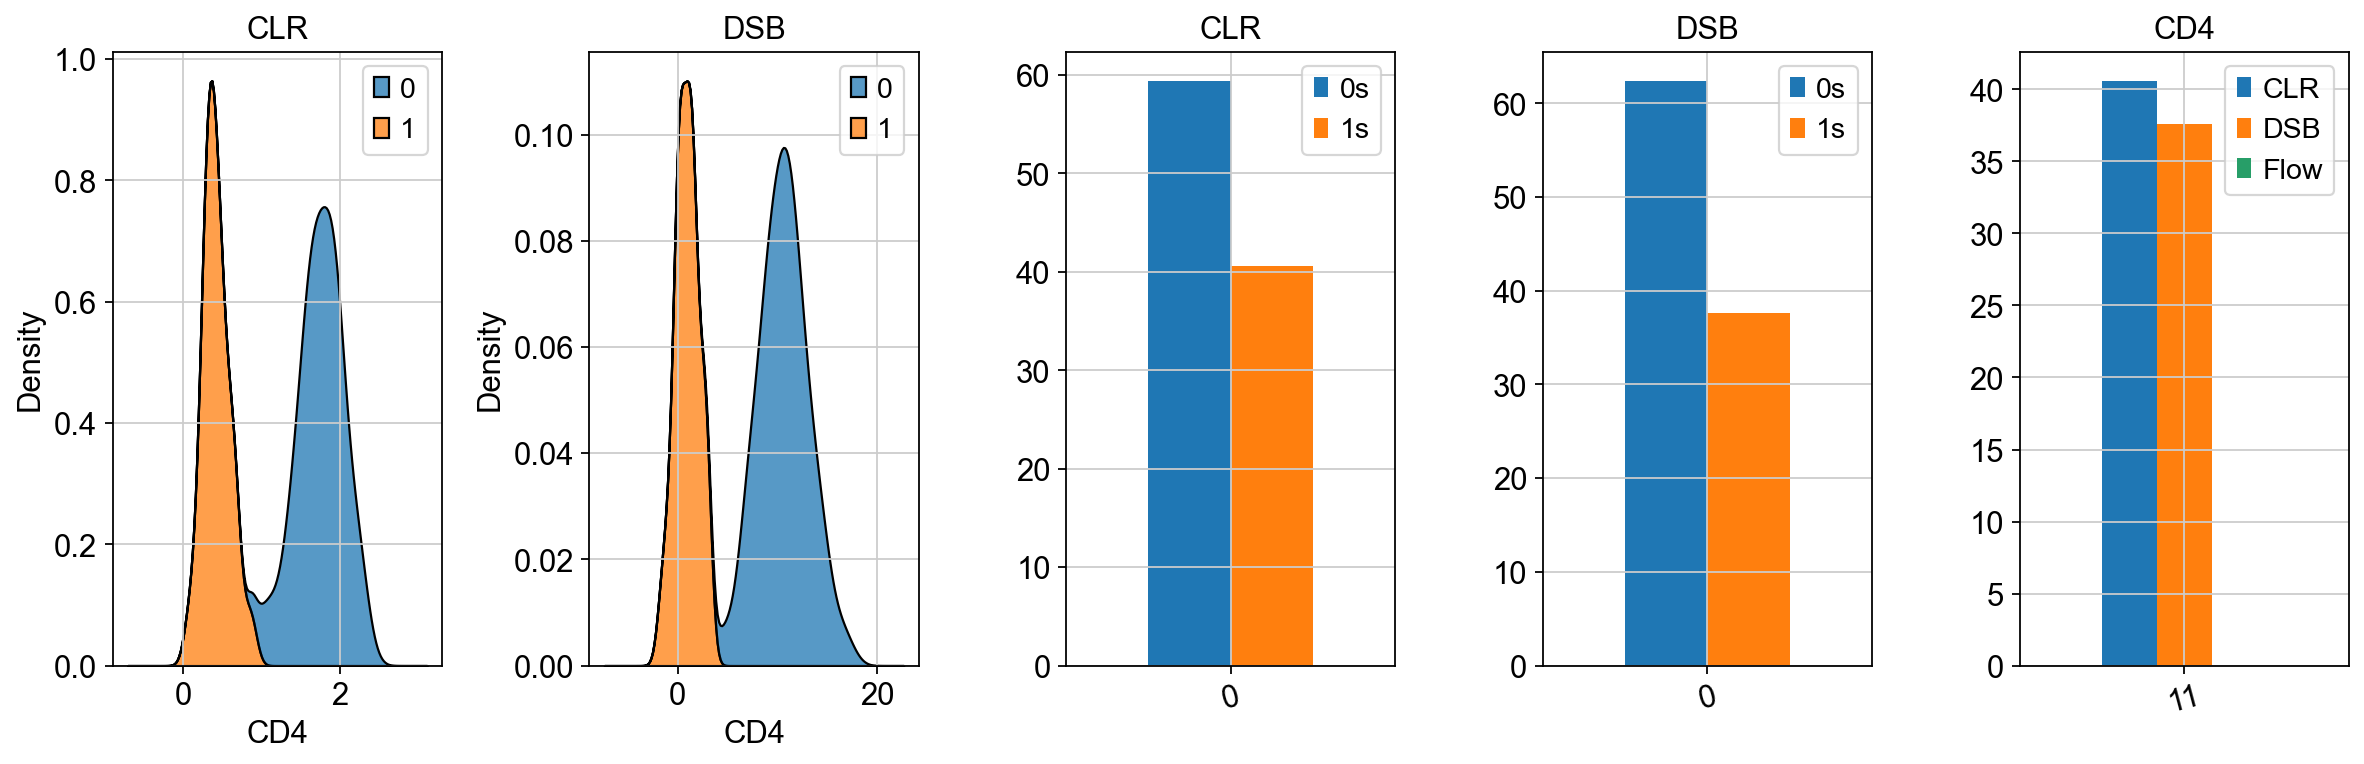

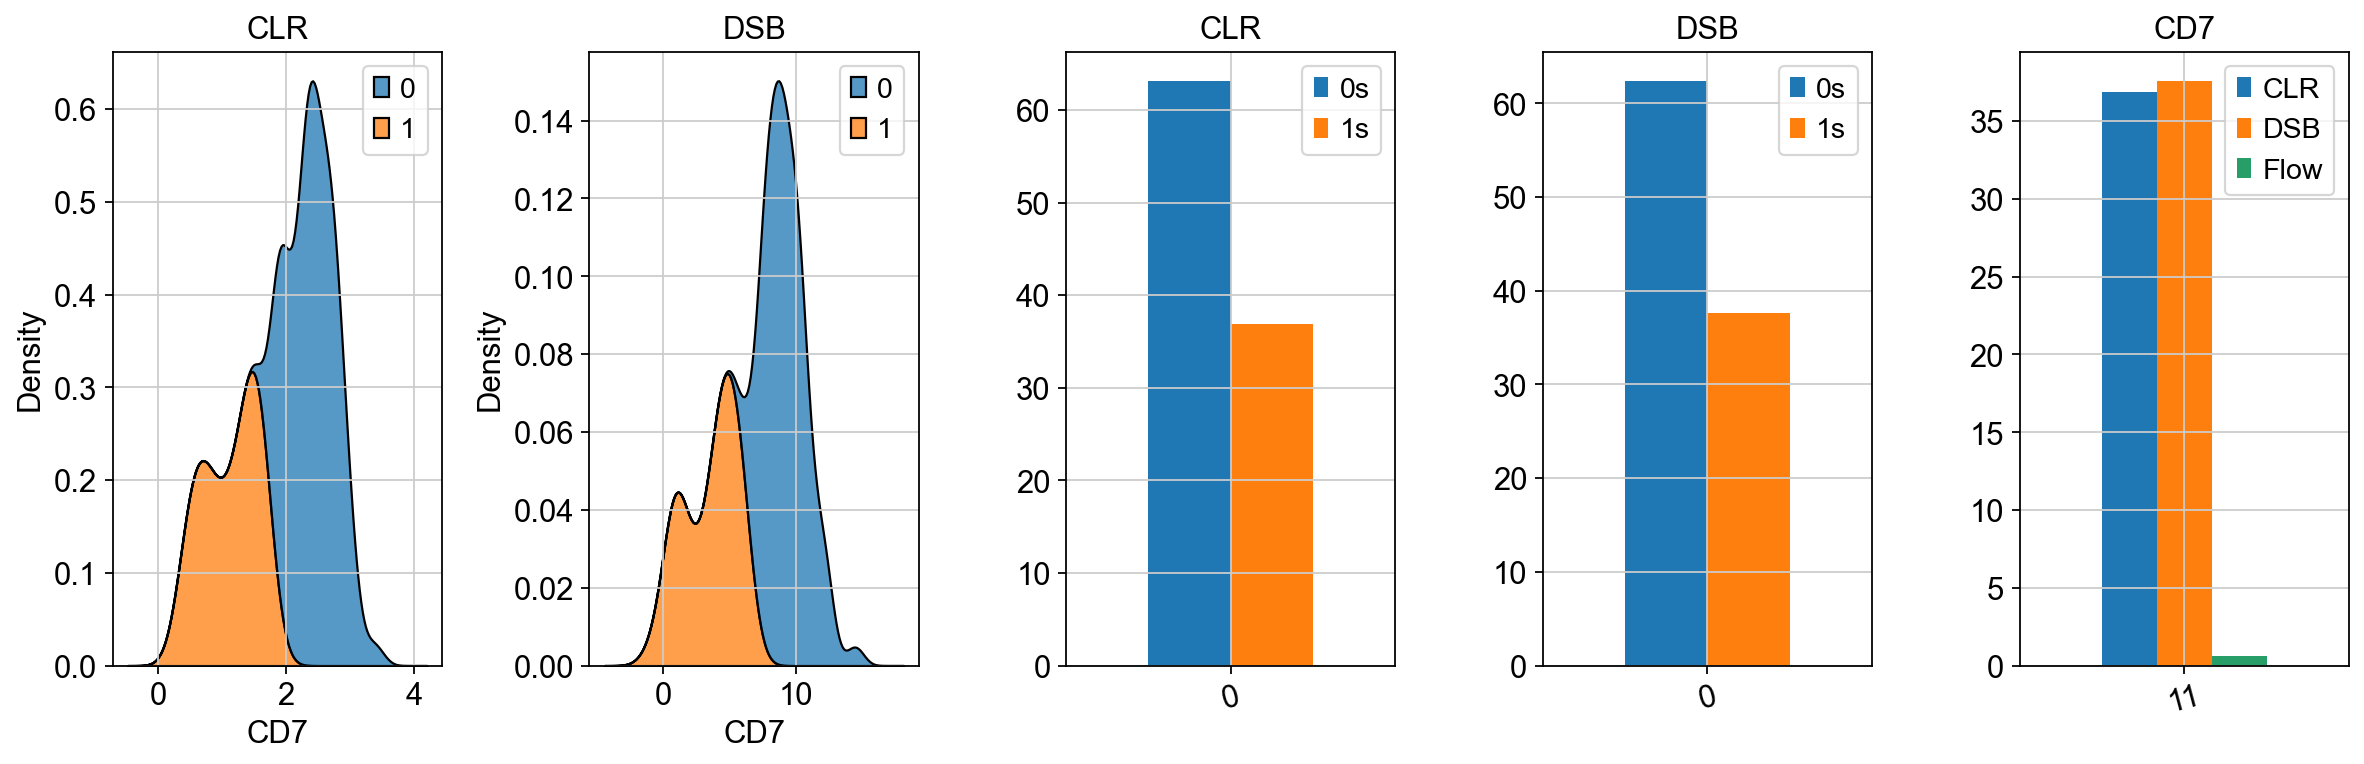

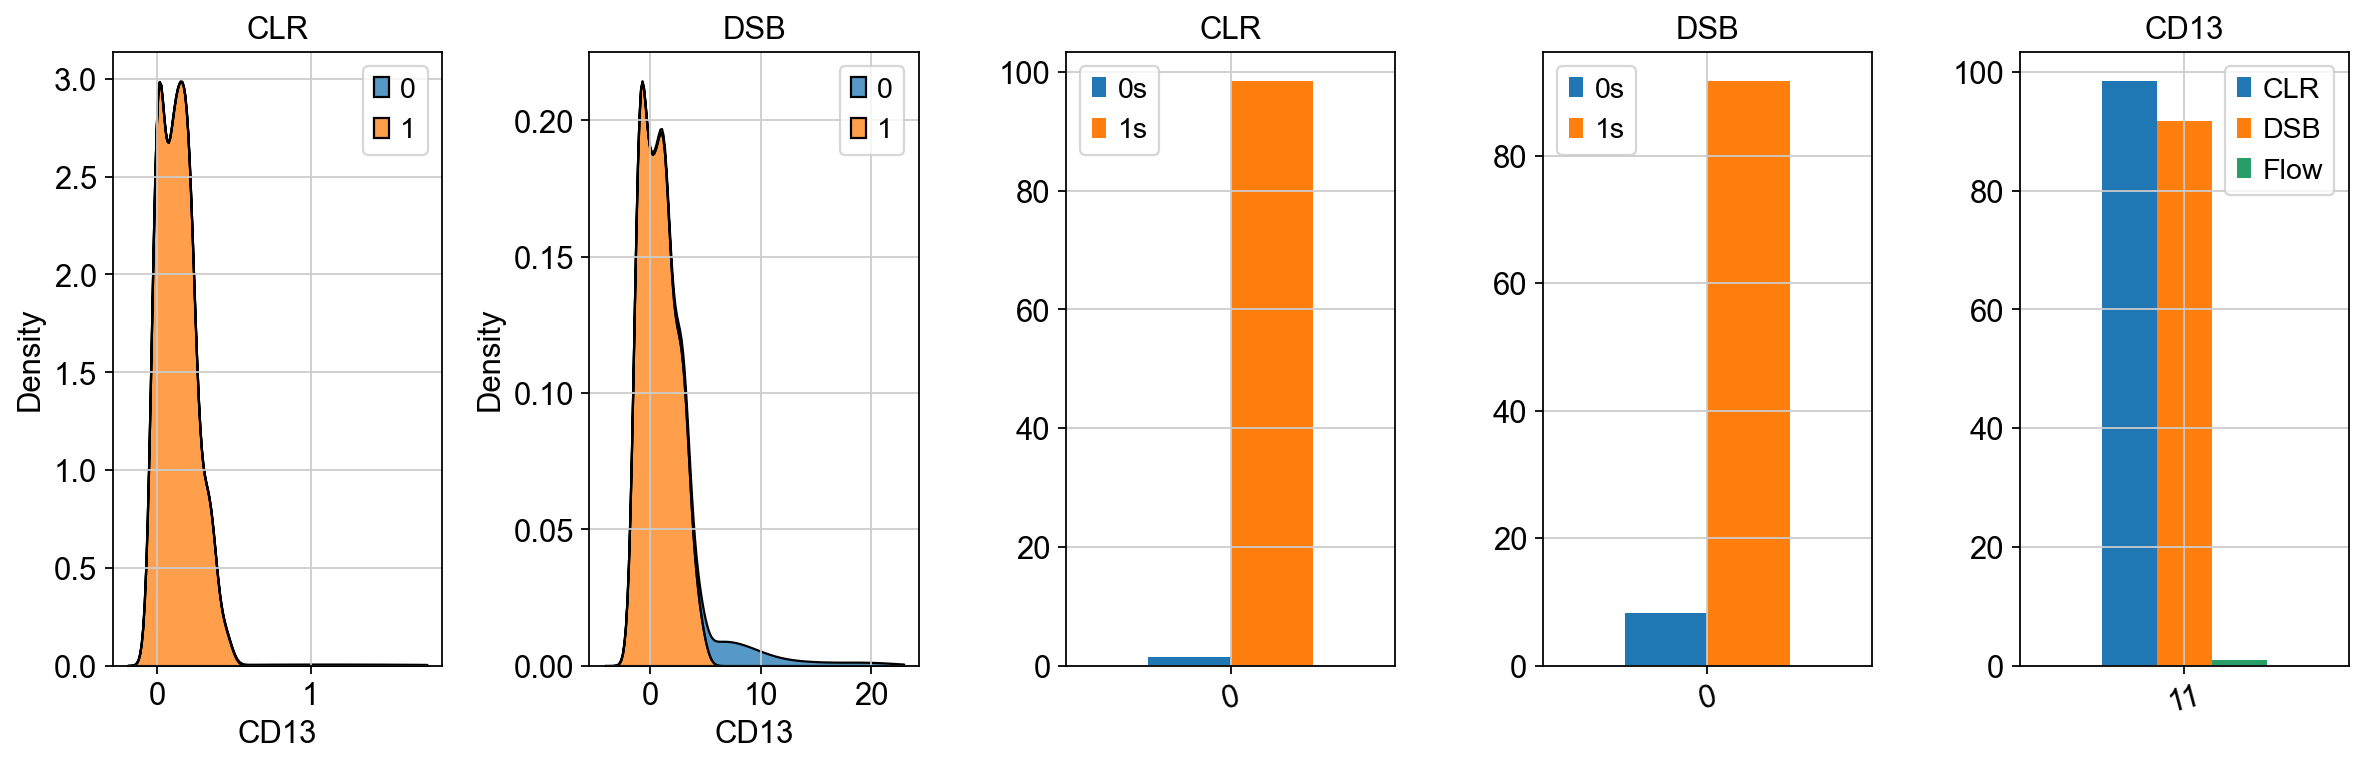

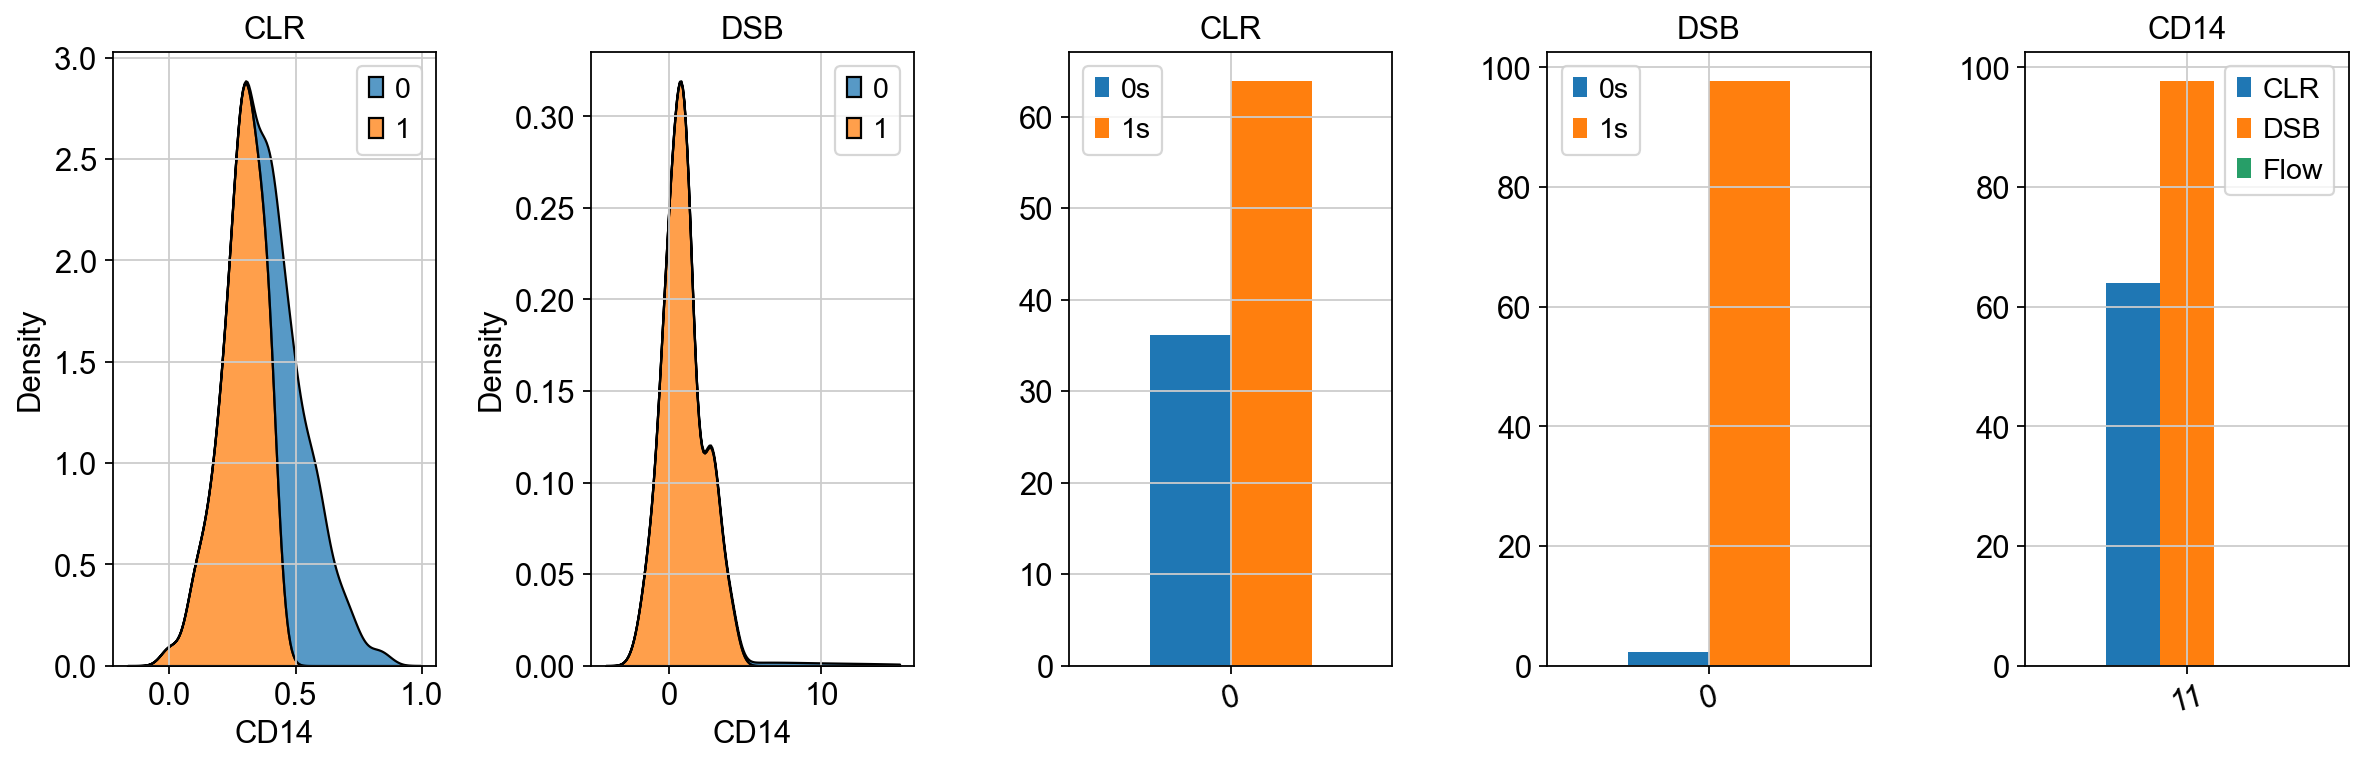

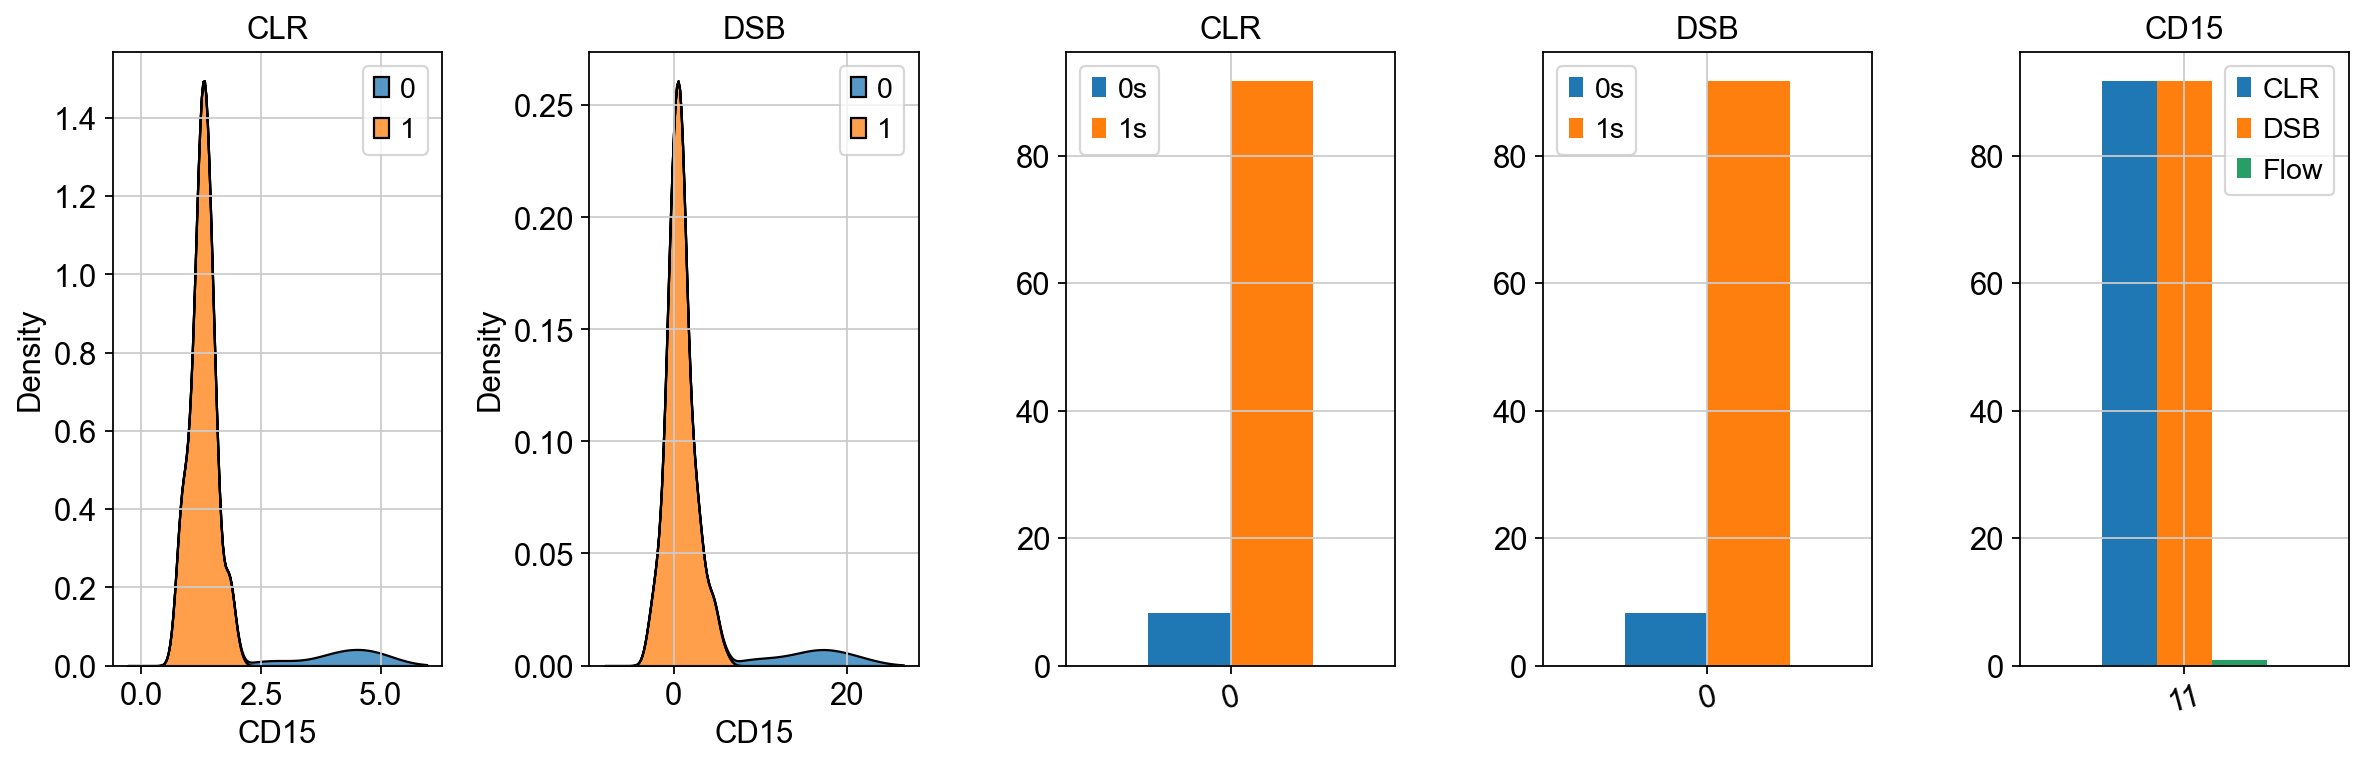

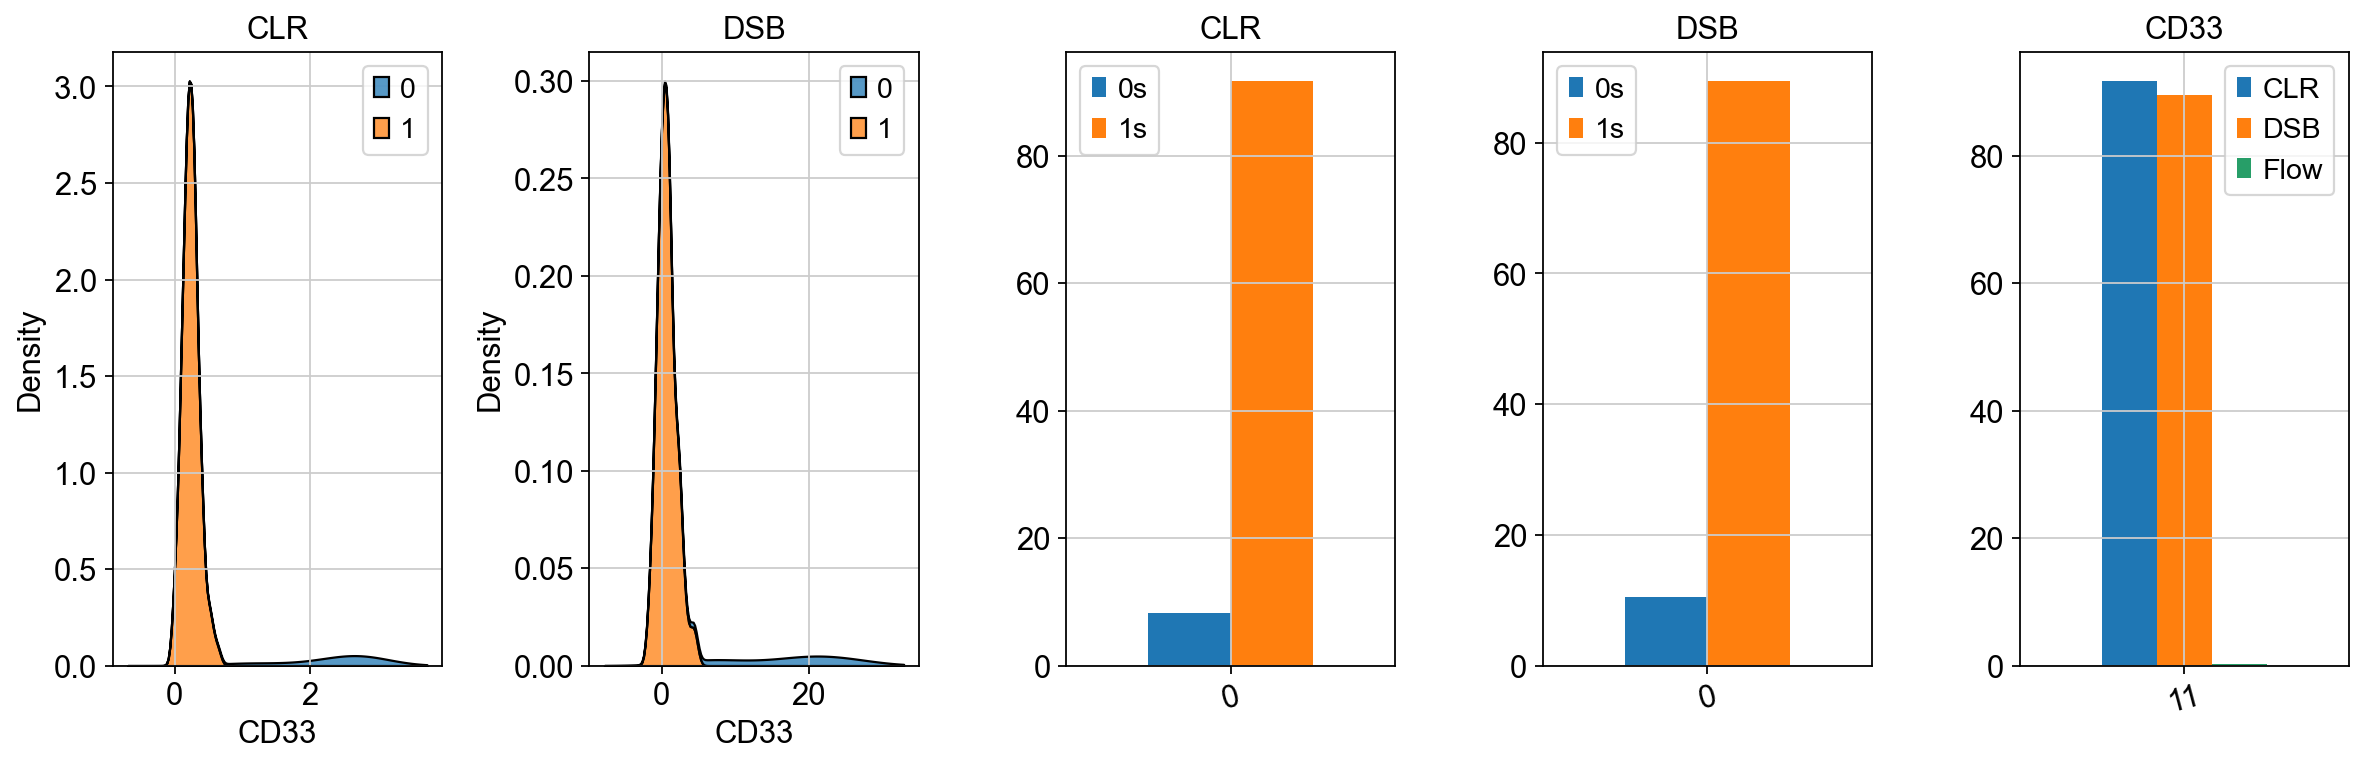

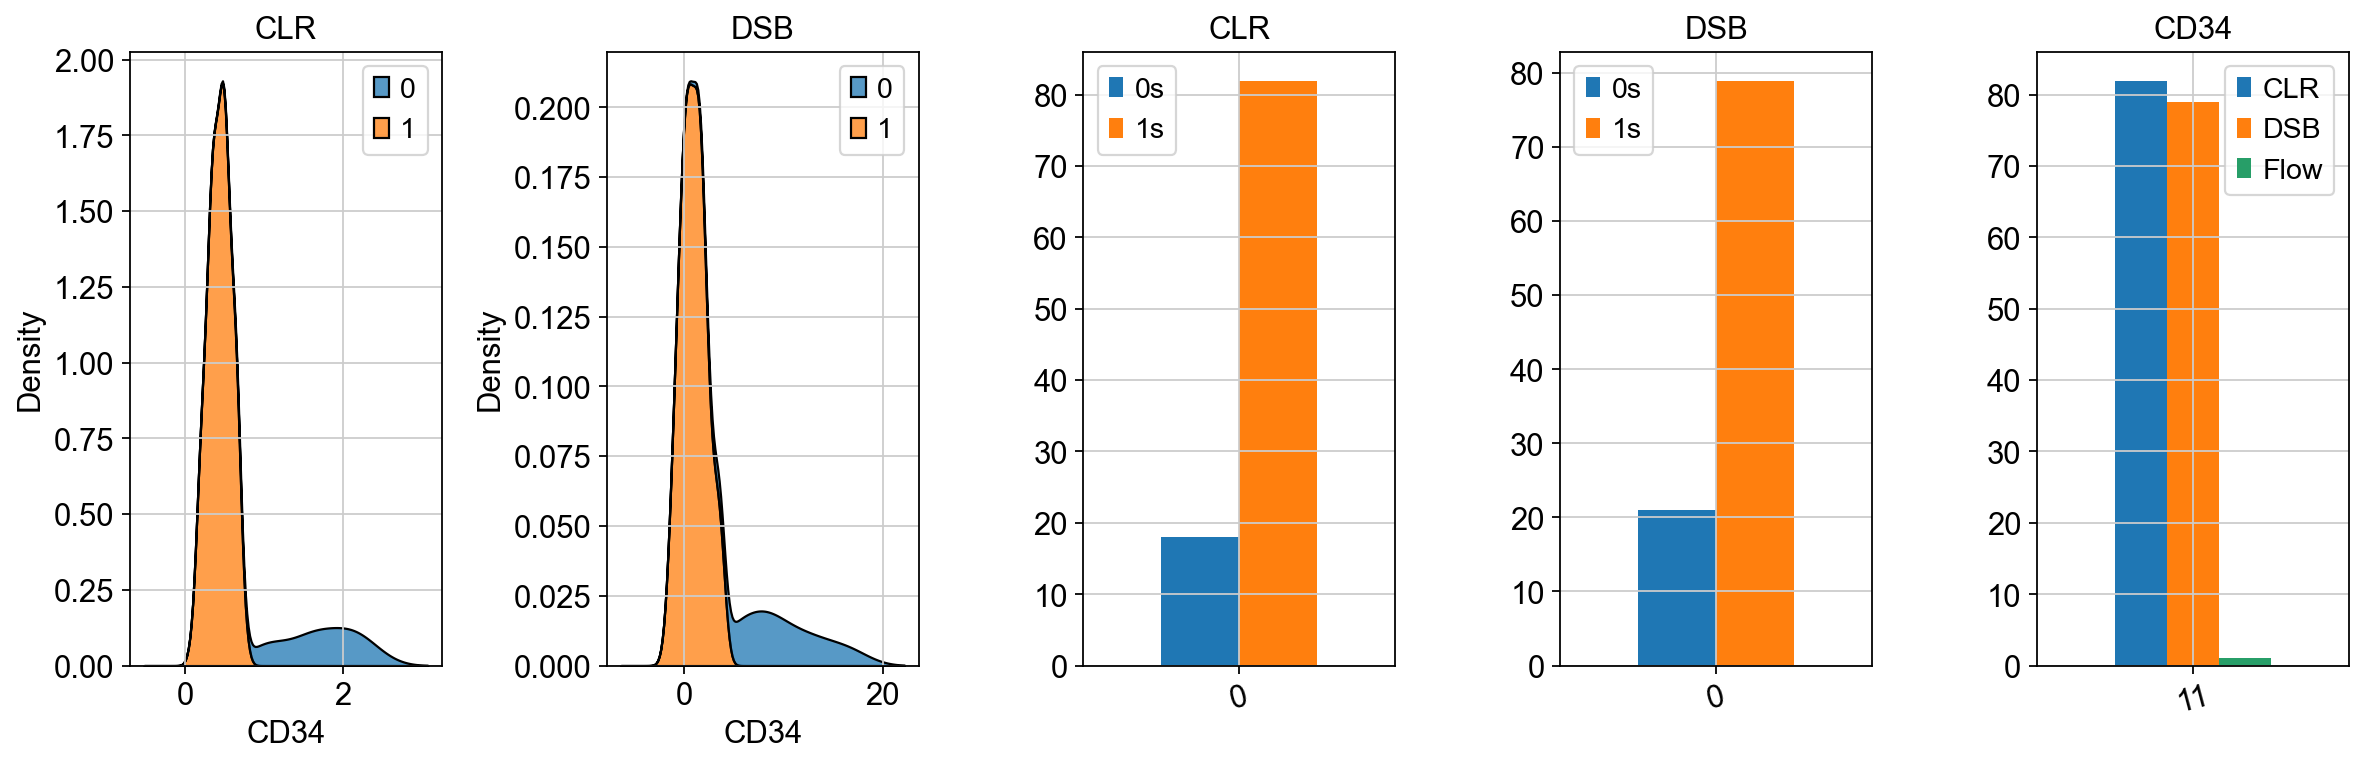

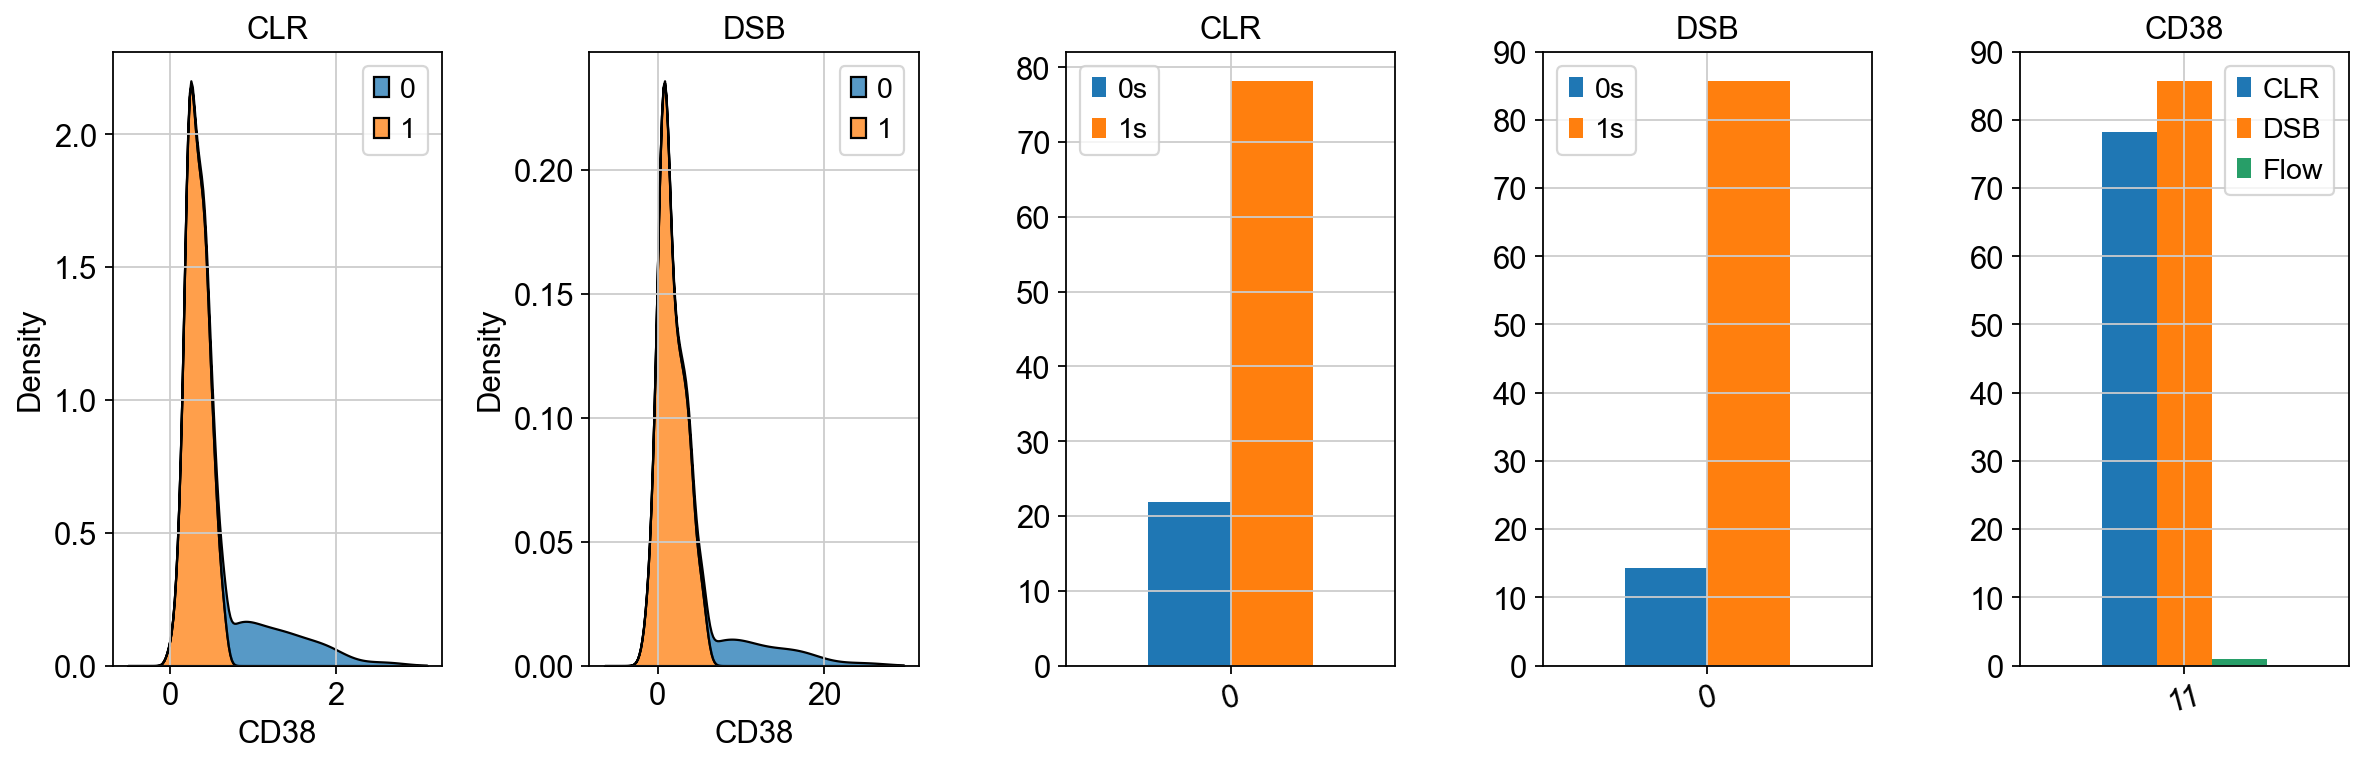

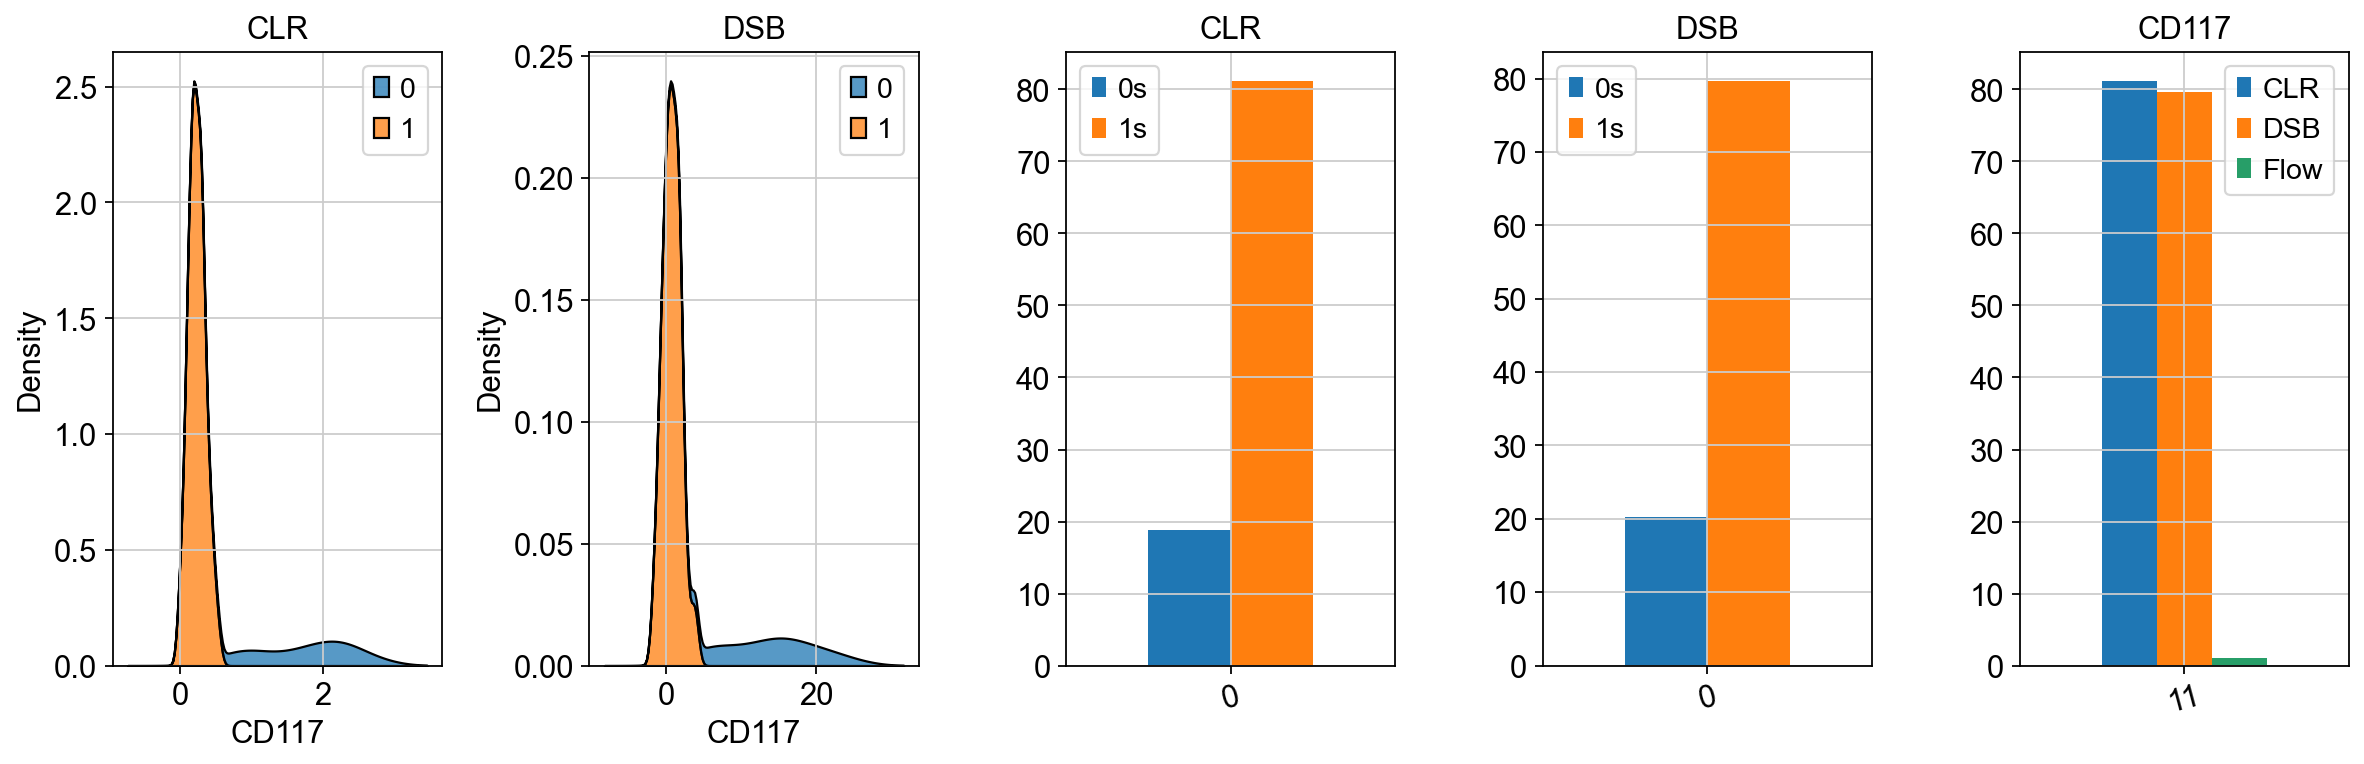

In [394]:
#All cells from cite-seq measurement included (flow only % of blasts)

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )


for column_name in column_names:
    fig, ax =plt.subplots(1,5,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    #CLR
    x_CLR= eg1_clr[column_name]
    x_CLR=x_CLR.values.reshape(-1, 1)
    gmm.fit(x_CLR)
    labels_CLR = gmm.predict(x_CLR)
    
    x0 = eg1_clr[column_name].reset_index(drop=True)[labels_CLR == 0].mean()
    x1 = eg1_clr[column_name].reset_index(drop=True)[labels_CLR == 1].mean()
    if x0 < x1:
        labels_CLR = (~(labels_CLR == 1)).astype(int)

    ax1 = sns.kdeplot(data=eg1_clr, x=column_name, hue=labels_CLR, multiple="stack", ax=ax[0]) ;
    
    #DSB
    x_DSB = eg1_dsb[column_name]
    x_DSB=x_DSB.values.reshape(-1, 1)
    gmm.fit(x_DSB)
    labels_DSB = gmm.predict(x_DSB)
    
    x0 = eg1_dsb[column_name].reset_index(drop=True)[labels_DSB == 0].mean()
    x1 = eg1_dsb[column_name].reset_index(drop=True)[labels_DSB == 1].mean()
    if x0 < x1:
        labels_DSB = (~(labels_DSB == 1)).astype(int)
    
    ax2 = sns.kdeplot(data=eg1_dsb, x=column_name, hue=labels_DSB, multiple="stack", color="g", ax=ax[1]) ;
      
    ax1.title.set_text('CLR')    #headings for subplots
    ax2.title.set_text('DSB')
    #ax3.title.set_text('CLR')    #headings for subplots
    #ax4.title.set_text('DSB')
    
    #Calculate zeros
    n_zeros1 = np.count_nonzero(labels_CLR==0)
    n_zeros2 = np.count_nonzero(labels_DSB==0)
    n_cells=len(eg1_dsb)
    result_zeros_CLR=(n_zeros1/n_cells * 100)
    result_zeros_DSB=(n_zeros2/n_cells * 100)
    #Calculate ones
    n_ones_CLR=np.count_nonzero(labels_CLR)
    n_ones_DSB=np.count_nonzero(labels_DSB)
    #percentages
    result_ones_CLR=(n_ones_CLR/n_cells * 100)
    result_ones_DSB=(n_ones_DSB/n_cells * 100)
    #Dataframes
    data_CLR = {"0s":[result_zeros_CLR],
        "1s":[result_ones_CLR]
        };

    dataFrame_CLR = pd.DataFrame(data=data_CLR)
    
    data_DSB = { "0s":[result_zeros_DSB],
        "1s":[result_ones_DSB]
        };
    dataFrame_DSB = pd.DataFrame(data=data_DSB)
    
    ax3= dataFrame_CLR.plot.bar(rot=15, title="CLR", ax=ax[2]);
    ax4= dataFrame_DSB.plot.bar(rot=15, title="DSB", ax=ax[3]);
    
    
    #combined
    
    all_data = {"CLR":[result_ones_CLR],
        "DSB":[result_ones_DSB],
        "Flow": eg1_nonulls[column_name],

        };

    all_data= pd.DataFrame(data=all_data);

    ax5=all_data.plot.bar(rot=15, title=column_name,ax=ax[4]);
    
    
    
    plt.show()

### Note: Below selection of CD34 positive cells (stemness marker) and similar analysis. Only 24 cells left, so results not reliable. 

## Finding CD34 positive cells (CLR normalized)  using GMM

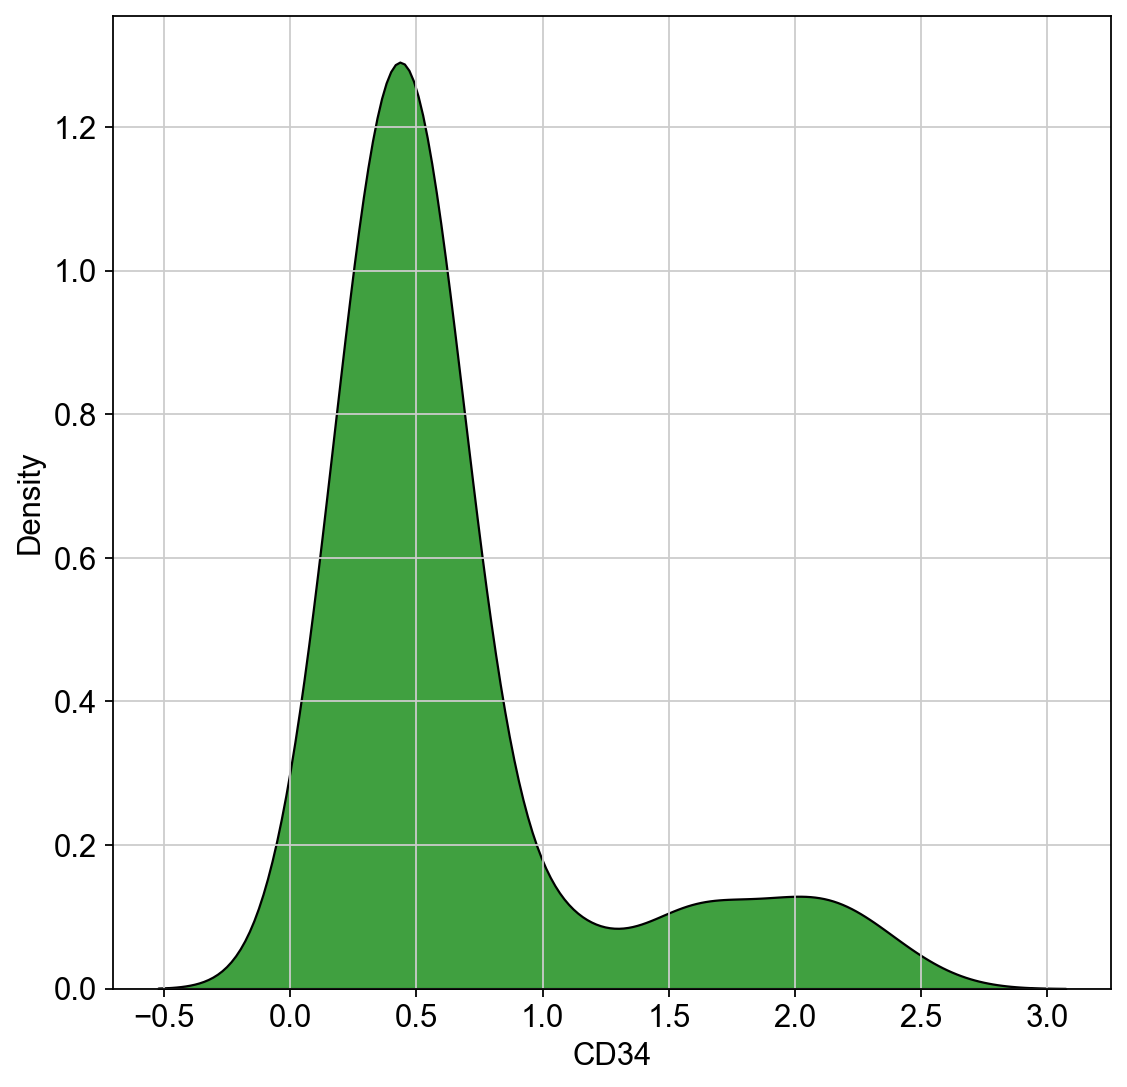

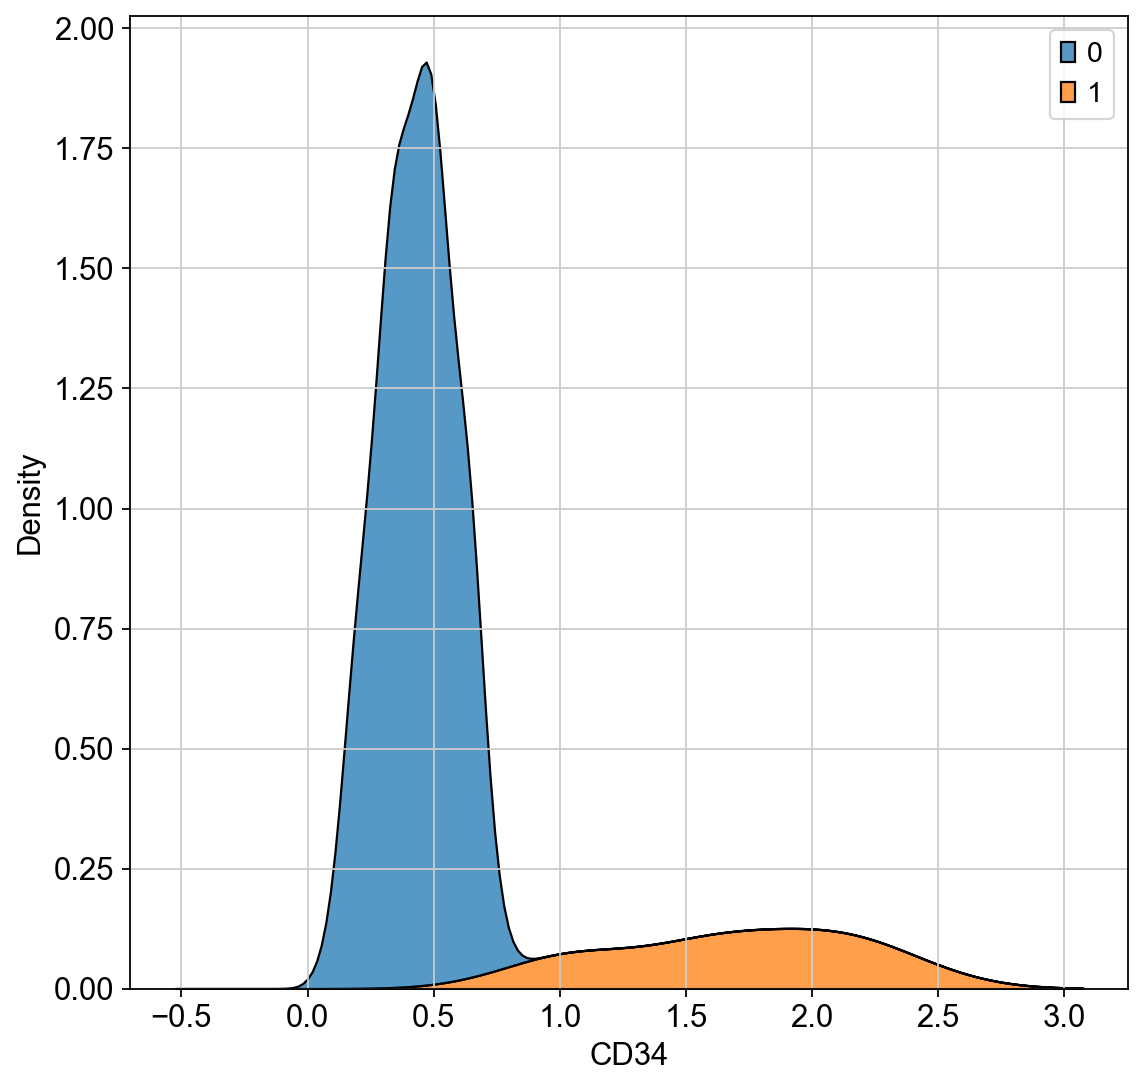

In [395]:


x = eg1_clr["CD34"]

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )

sns.kdeplot(data=eg1_clr, x="CD34", multiple="stack", color="g")
plt.show()

#to numpy
x=x.values.reshape(-1, 1)

#model fit and prediction
gmm.fit(x)
labels_clr = gmm.predict(x)

#visualization of the results
sns.kdeplot(data=eg1_clr, x="CD34", multiple="stack", hue=labels_clr) ;

In [329]:
#label column to original df

eg1_clr['labels']= labels_clr

In [336]:
eg1_clr

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34,labels
AAAGTAGCATGACATC-1,0.356789,1.568066,0.356789,0.952600,2.517058,1.568066,0.585685,0.219128,0.267152,1.355486,...,1.460330,0.115554,0.219128,0.267152,3.137631,0.975951,0.219128,0.115554,0.619215,0
AACCATGGTTAAAGAC-1,0.555693,1.290554,0.665686,0.910795,2.451587,1.252672,0.910795,0.239203,0.340289,2.347392,...,1.445231,0.239203,0.184550,0.126737,2.884227,0.475010,0.126737,0.000000,0.555693,0
AACTCAGAGTACGCCC-1,0.299261,1.386347,0.569564,0.681486,2.532284,0.983776,0.487322,0.299261,0.443518,2.666970,...,1.532160,0.000000,0.246148,0.067446,3.570583,0.529288,0.487322,0.000000,0.443518,0
AAGGCAGGTCCGAGTC-1,0.215060,1.334804,0.391955,0.587668,3.025037,0.788312,1.015060,0.277567,0.494592,1.886843,...,1.124749,0.148383,0.336396,0.148383,4.082684,0.444590,0.391955,0.000000,0.494592,0
AAGTCTGTCATCTGTT-1,0.270912,1.278988,0.417789,0.659322,2.273413,2.033147,0.808546,0.761236,0.417789,2.806870,...,1.388263,0.188503,0.188503,0.000000,3.285509,0.711577,0.417789,0.098686,0.347045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCGTGGTCG-1,0.091278,1.248439,0.323743,0.620661,2.652472,1.192027,0.620661,0.453263,0.453263,1.818230,...,1.573379,0.091278,0.174916,0.091278,3.367395,0.620661,0.174916,0.091278,0.323743,0
TTGACTTCATCGGAAG-1,0.347330,1.068257,0.079787,1.123765,2.239509,1.482813,0.509497,0.222479,0.509497,3.000870,...,1.123765,0.153676,0.153676,0.153676,3.580286,0.732241,0.153676,0.000000,0.458308,0
TTGTAGGGTCCGTGAC-1,0.268483,1.568285,0.599539,0.706358,2.163264,0.706358,0.479928,0.414292,0.000000,1.894058,...,1.380561,0.097725,0.414292,0.344043,3.714482,0.479928,0.268483,0.186745,0.186745,0
TTTACTGCATTCTCAT-1,0.000000,1.446543,0.802966,0.202147,2.287379,0.802966,1.680556,0.898607,0.514070,0.802966,...,1.242512,0.289711,2.252665,0.202147,3.807139,0.578912,0.514070,0.444730,1.593407,1


In [338]:
#select only cells with label 1 (CD45 positive)
CD34pos_clr=eg1_clr.loc[eg1_clr['labels'] == 1]

In [339]:
#df containing CD34 positive cells (identified by GMM) 

CD34pos_clr

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34,labels
ACCGTAATCCCATTAT-1,0.367120,1.267097,0.287191,0.200313,1.928228,1.097301,1.059586,0.692164,0.367120,0.692164,...,1.464824,0.200313,1.771434,0.367120,4.099790,0.200313,0.510039,0.287191,1.752392,1
ACTTTCAAGGCGTACA-1,0.189331,1.442401,0.485707,0.547858,1.738698,1.056391,0.941300,0.899791,0.547858,1.282465,...,0.941300,0.000000,2.245155,0.189331,3.928241,0.661649,0.272057,0.000000,1.682181,1
ATCACGAAGAAGCCCA-1,0.459547,1.983906,0.636376,0.659265,0.724950,0.666780,1.063300,1.121977,0.703531,0.850886,...,0.844639,0.342419,0.819252,0.572644,2.257668,0.486805,0.422009,0.321491,1.140795,1
CACACTCCAAAGAATC-1,0.296865,1.370644,0.359101,0.525478,2.162213,1.325766,1.278779,0.831223,0.296865,0.575307,...,1.876428,0.082877,2.181904,0.230497,4.154695,1.065050,0.296865,0.359101,1.532374,1
CATGACACAATACGCT-1,0.240031,1.269160,0.381900,0.270061,2.659779,0.823706,1.895864,1.758837,0.381900,1.177983,...,1.279994,0.209071,2.151306,0.177123,4.092816,0.889517,0.177123,0.327543,2.262150,1
CCACTACCAAAGGAAG-1,0.347408,1.004597,0.484332,0.188715,2.697761,1.230555,2.095674,1.397783,1.029633,0.677653,...,1.326886,0.129680,1.077900,0.129680,3.518887,0.745605,0.188715,0.000000,0.952561,1
CCTACACCACAGACTT-1,0.070233,1.157744,0.310268,0.458731,2.156357,1.624219,0.955773,1.363621,0.255442,1.930566,...,1.344839,0.000000,0.805086,0.310268,3.189760,0.665702,0.197435,0.255442,1.486057,1
CGGCTAGAGCCAGTTT-1,0.102242,1.021098,0.430649,0.805577,2.711276,0.756280,0.919132,0.498291,0.102242,1.972682,...,1.148361,0.238330,0.465042,0.319746,3.875462,0.319746,0.194993,0.000000,0.875245,1
CGTCAGGCAGCCTGTG-1,0.355712,1.020474,0.355712,0.355712,0.686041,0.920927,1.478124,2.582063,0.443815,1.111002,...,1.111002,0.123496,1.111002,0.259091,3.146180,0.686041,0.485116,0.332418,1.543397,1
CGTTCTGTCCGAATGT-1,0.302374,1.104437,0.302374,0.183781,2.537752,0.591673,1.782203,1.839915,0.473284,1.121014,...,1.244577,0.096106,2.699378,0.183781,4.437053,0.619203,0.183781,0.441359,2.325342,1


In [401]:
eg1_nonulls = eg1_nonulls / 100

eg1_nonulls

,CD2,CD3,CD4,CD7,CD11a,CD13,CD14,CD15,CD33,CD34,CD36,CD38,CD99,CD117,CD133,HLA-DR,MPO
11,87.0,3.0,0.0,64.0,99.0,98.0,1.0,91.0,20.0,99.0,6.0,99.0,100.0,99.0,59.0,93.0,49.0


## Finding CD34 positive cells (DSB normalized)  using GMM

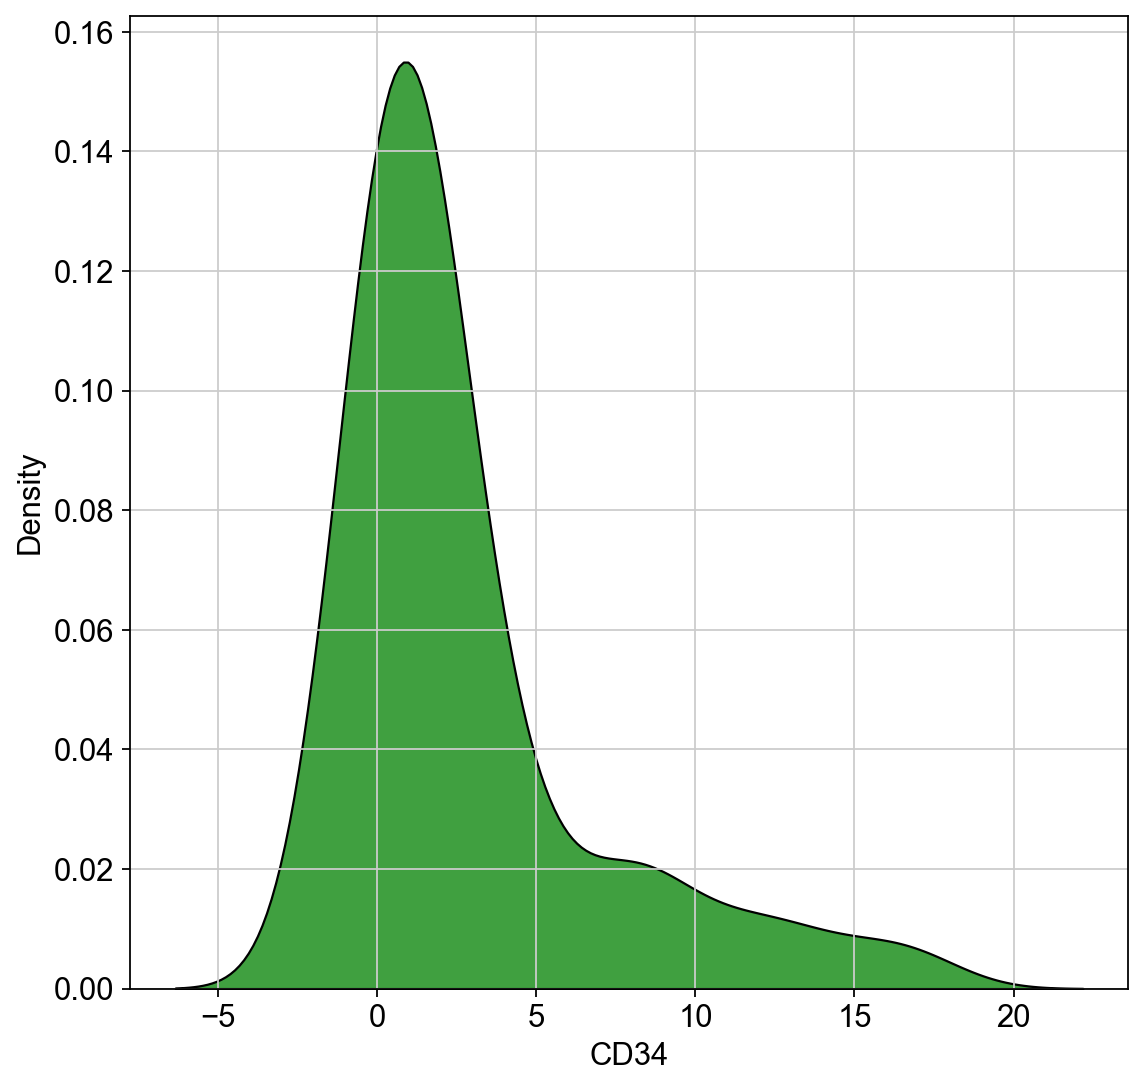

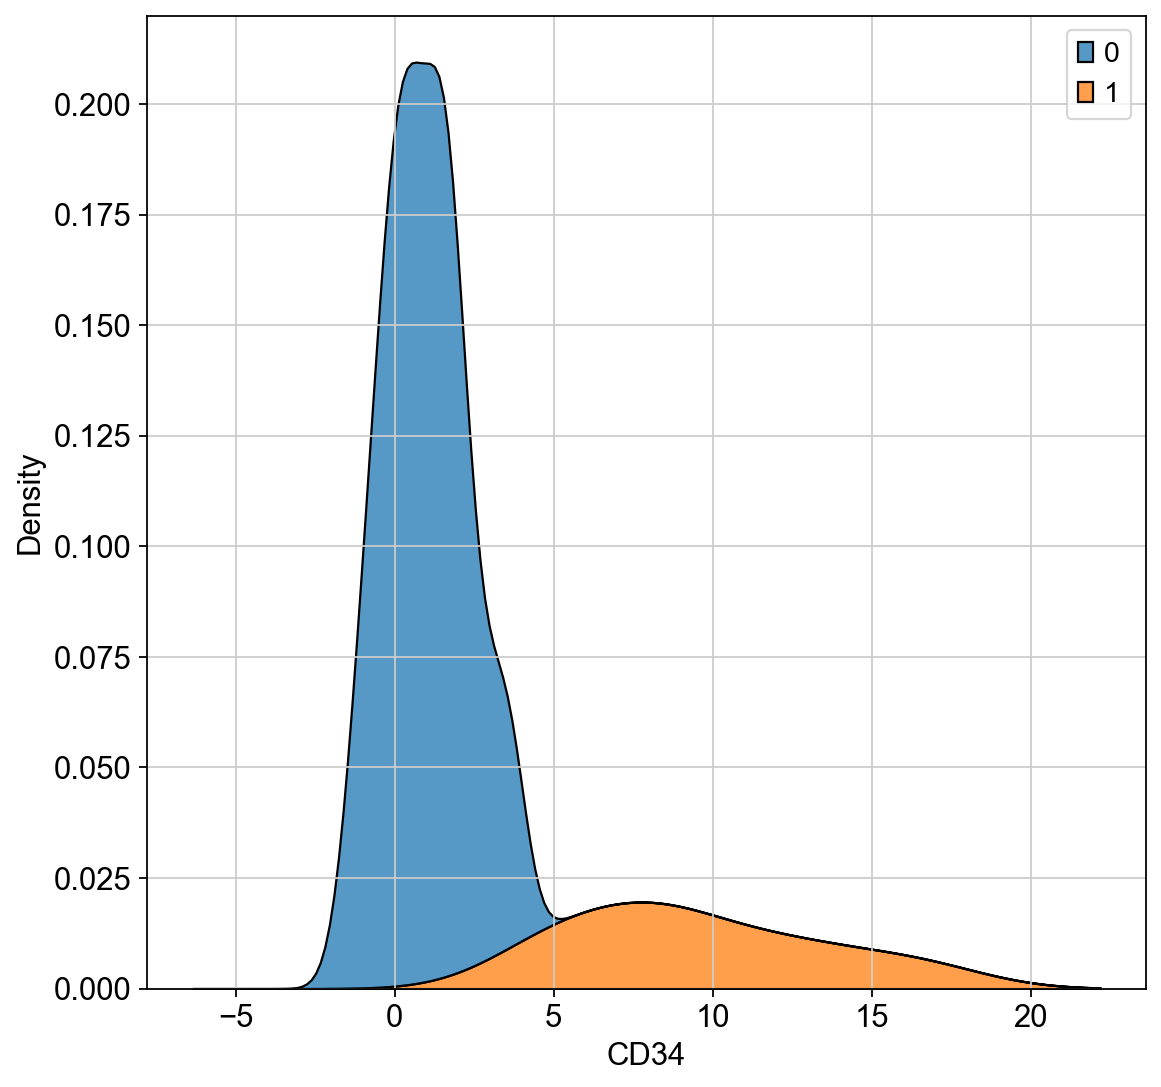

In [425]:

x = eg1_dsb["CD34"]

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )

sns.kdeplot(data=eg1_dsb, x="CD34", multiple="stack", color="g")
plt.show()

#to numpy
x=x.values.reshape(-1, 1)

#model fit and prediction
gmm.fit(x)
labels_dsb = gmm.predict(x)

#visualization of the results
sns.kdeplot(data=eg1_dsb, x="CD34", multiple="stack", hue=labels_dsb) ;

In [426]:
eg1_dsb['labels']= labels_dsb

In [427]:
#select only cells with label 1 (CD45 positive)
CD34pos_dsb=eg1_dsb.loc[eg1_dsb['labels'] == 1]

In [403]:
column_names

['CD2',
 'CD3',
 'CD4',
 'CD7',
 'CD13',
 'CD14',
 'CD15',
 'CD33',
 'CD34',
 'CD38',
 'CD117']

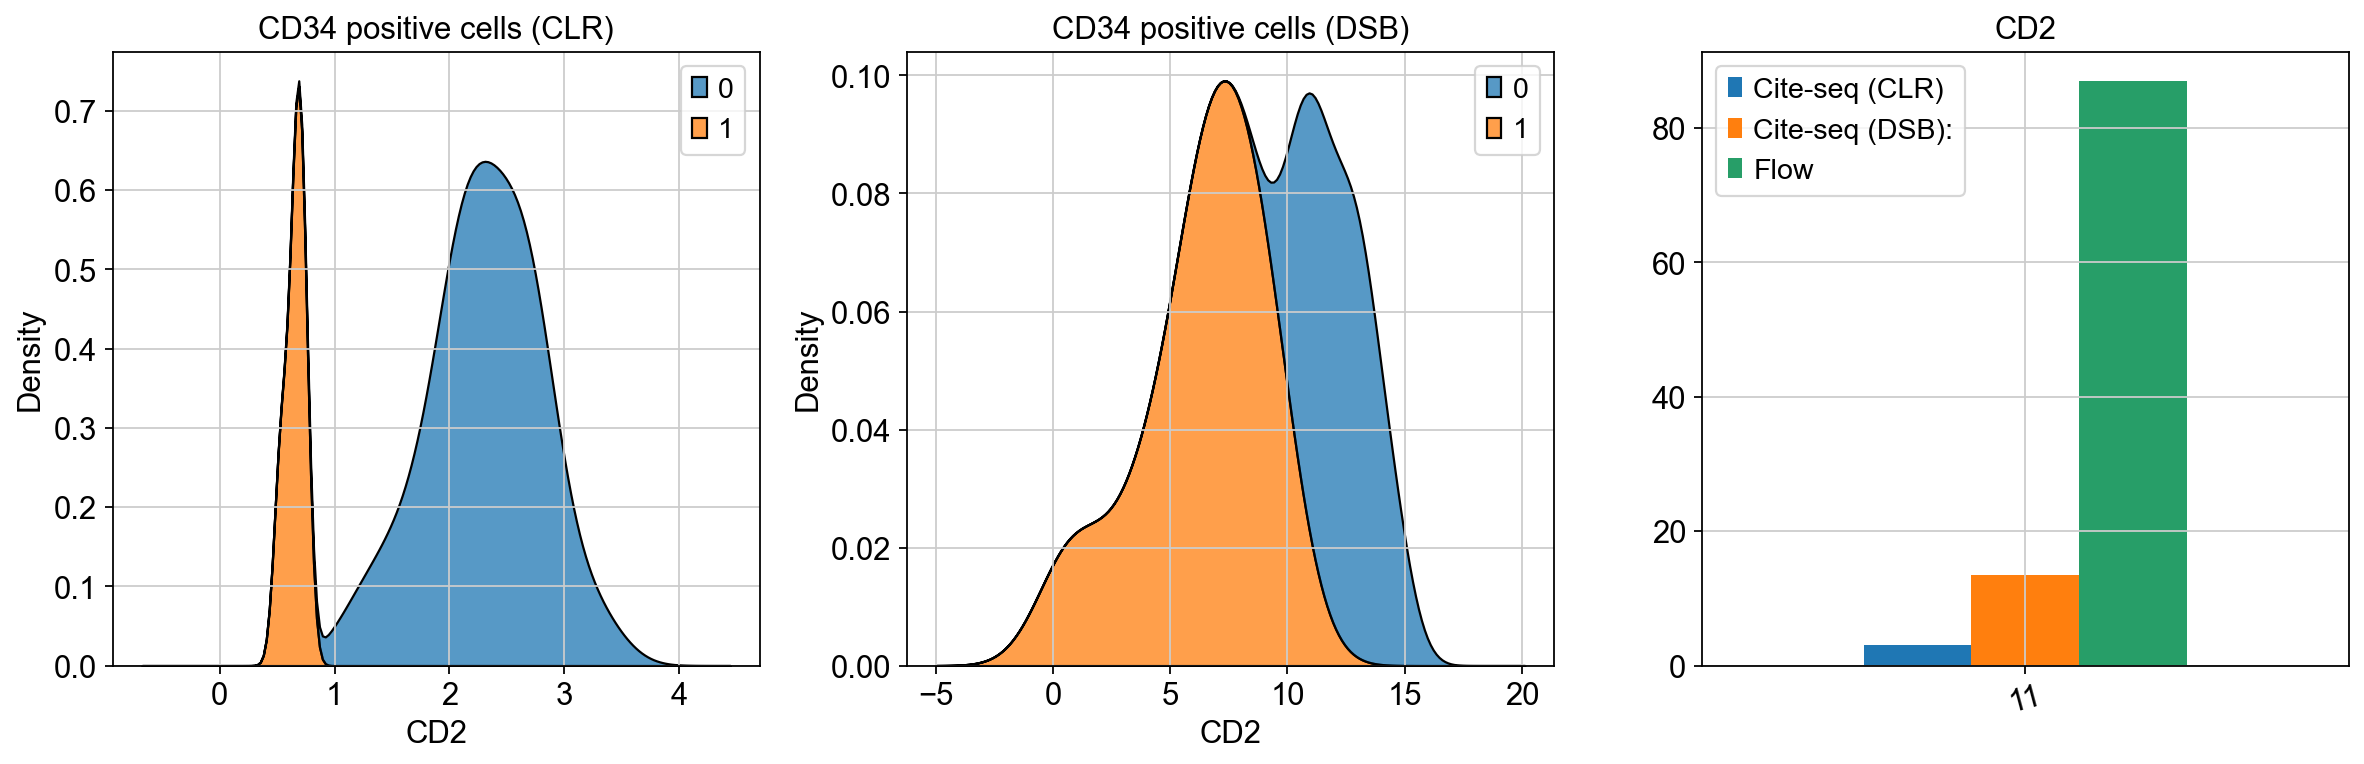

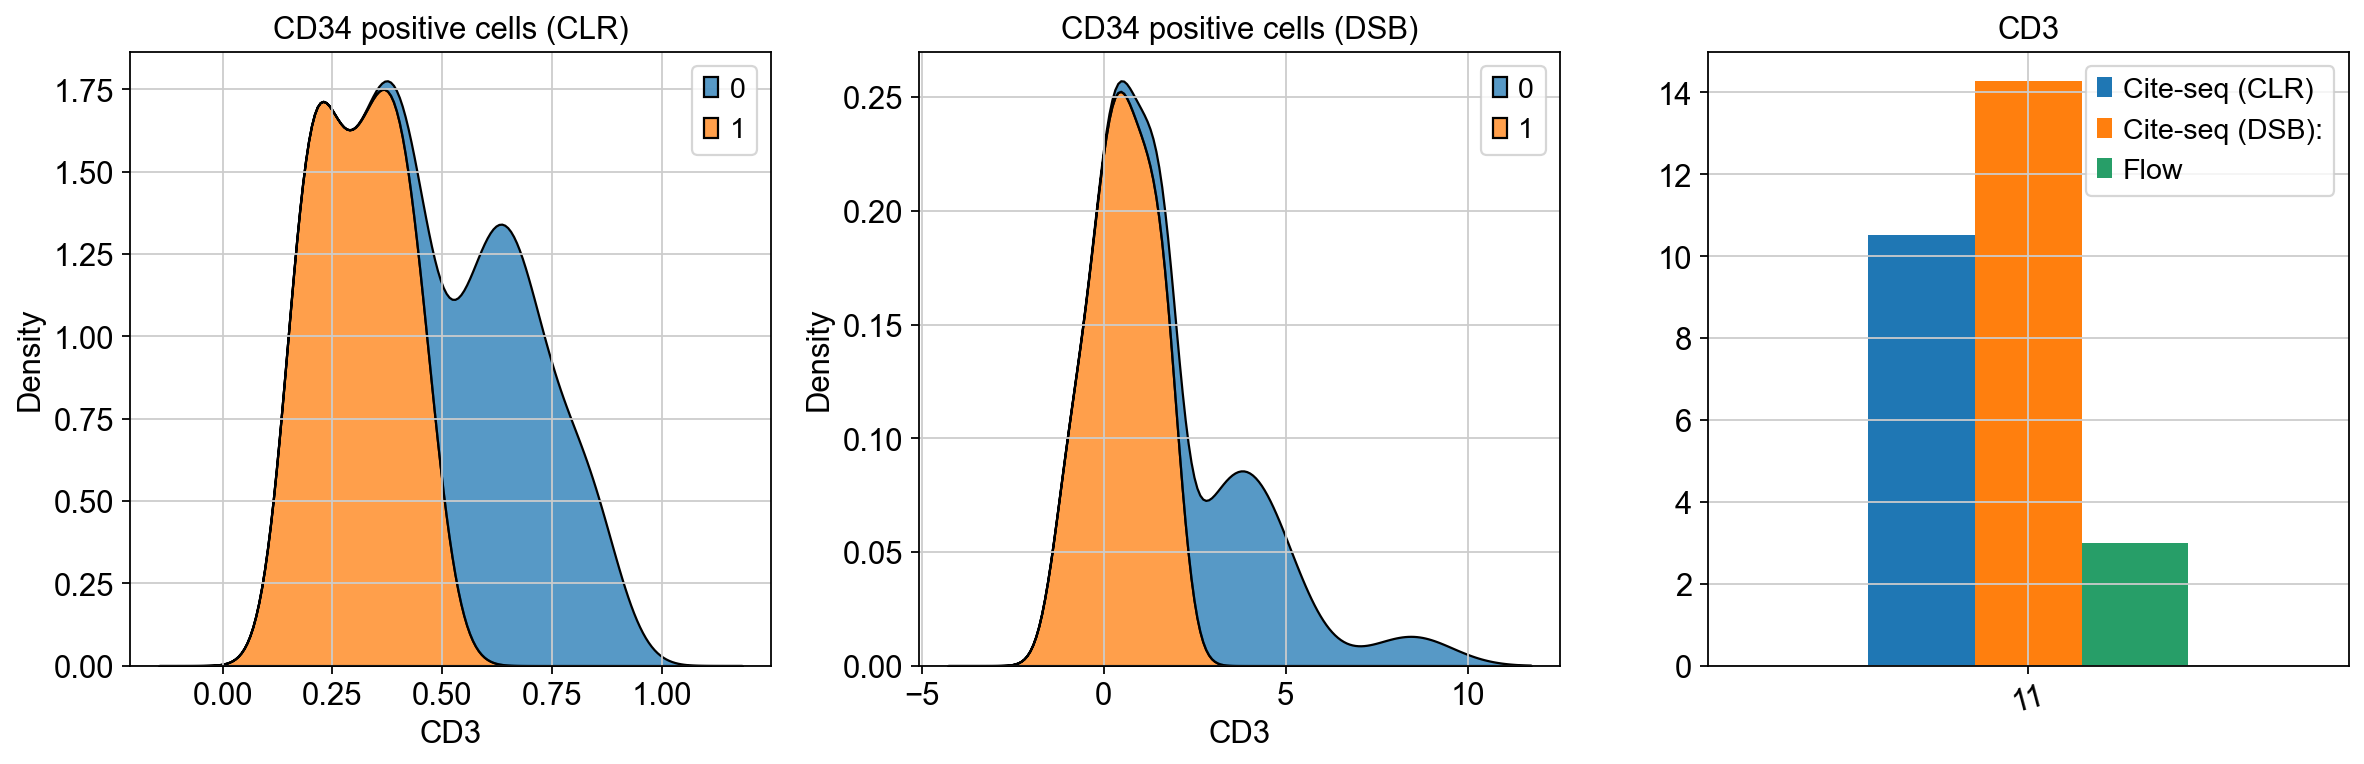

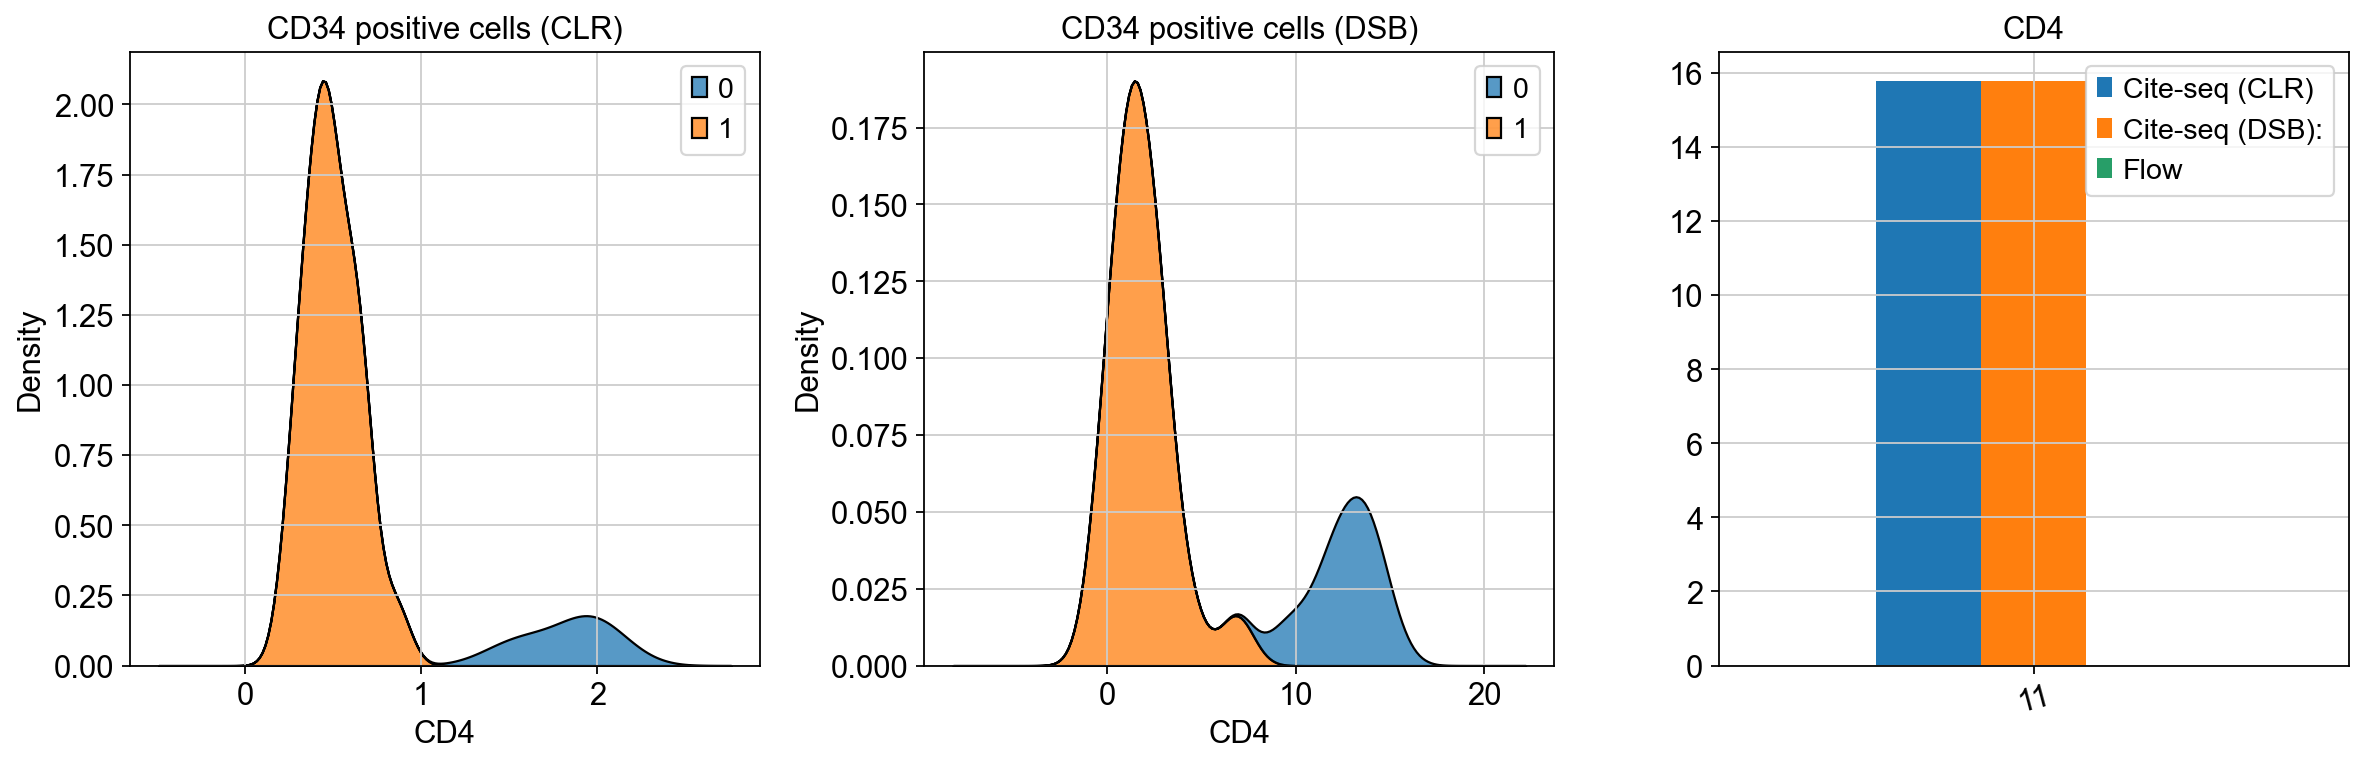

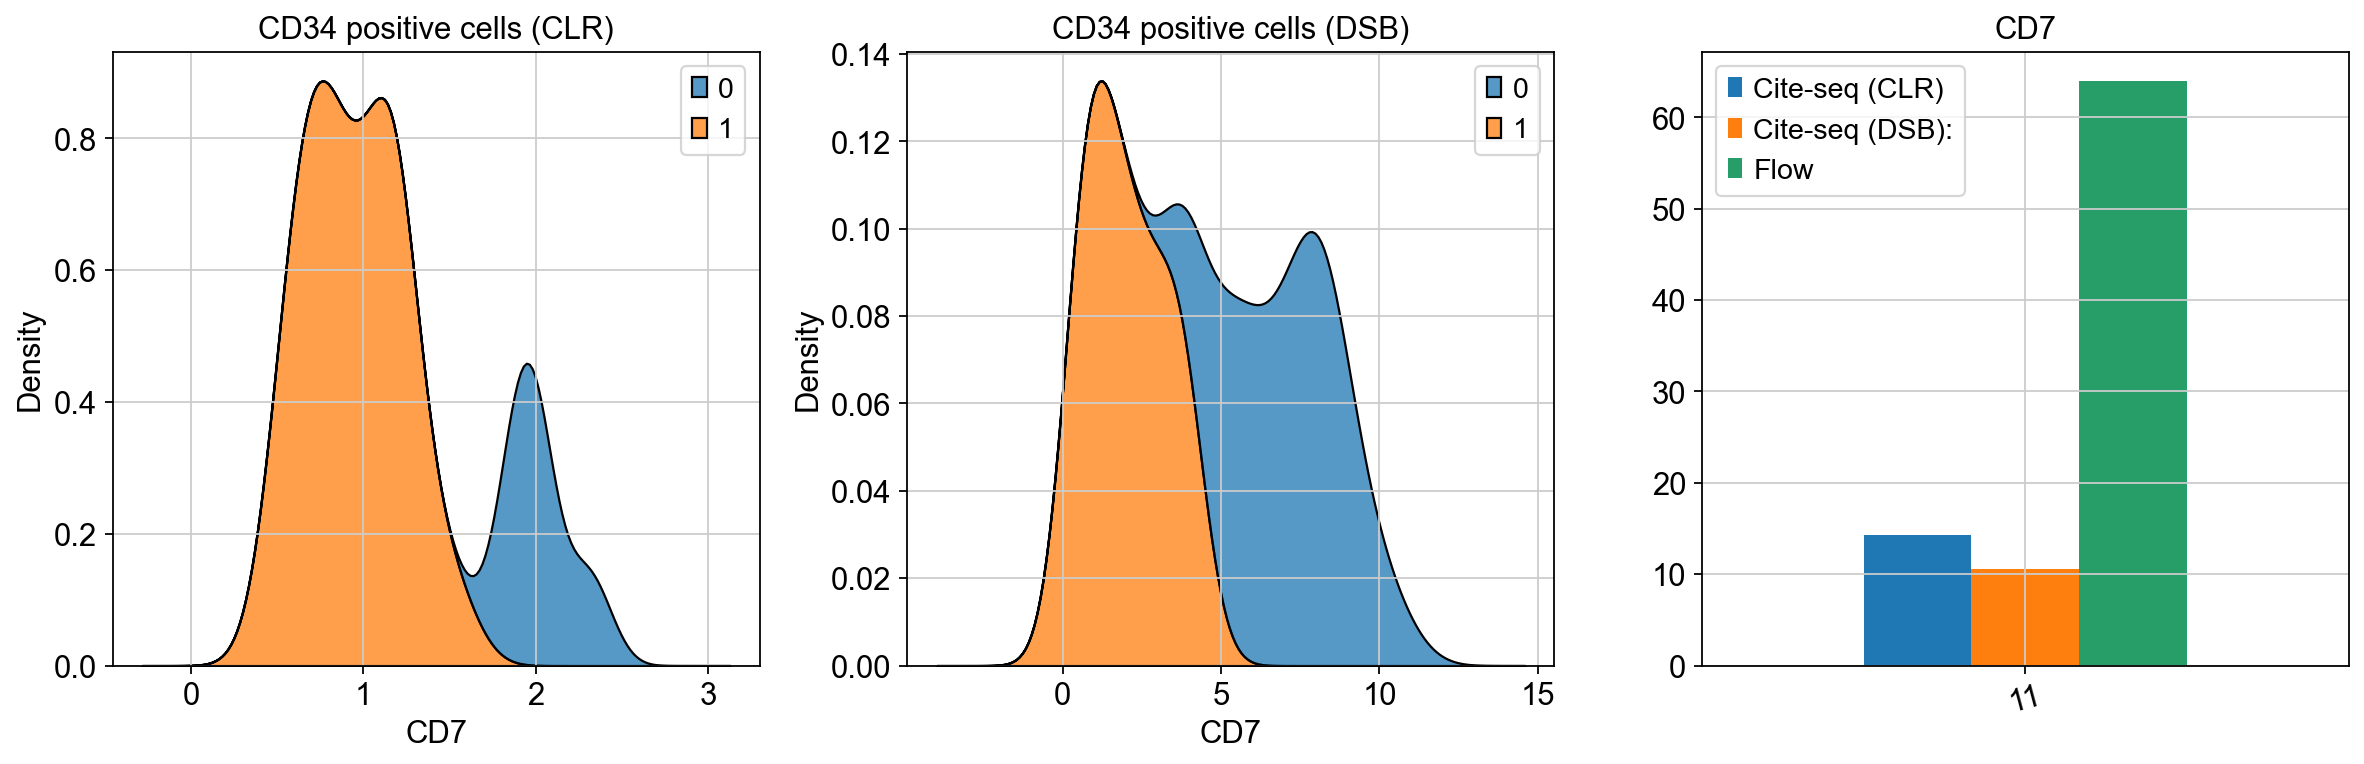

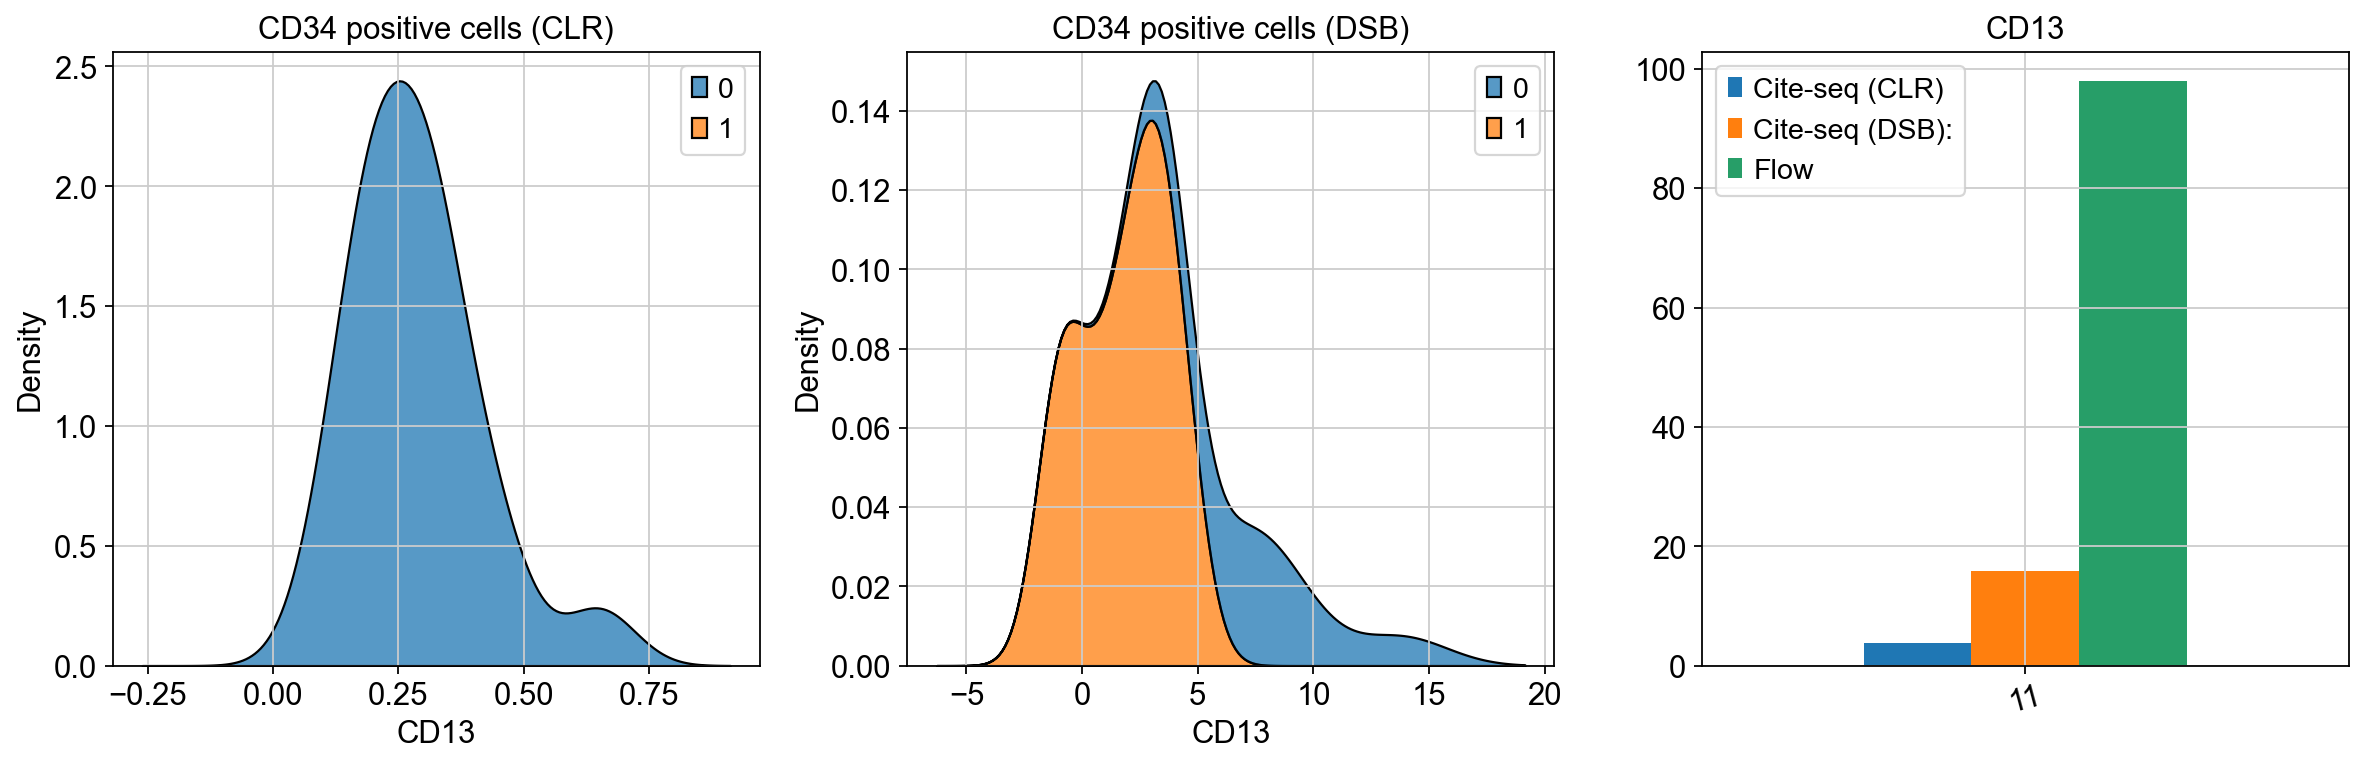

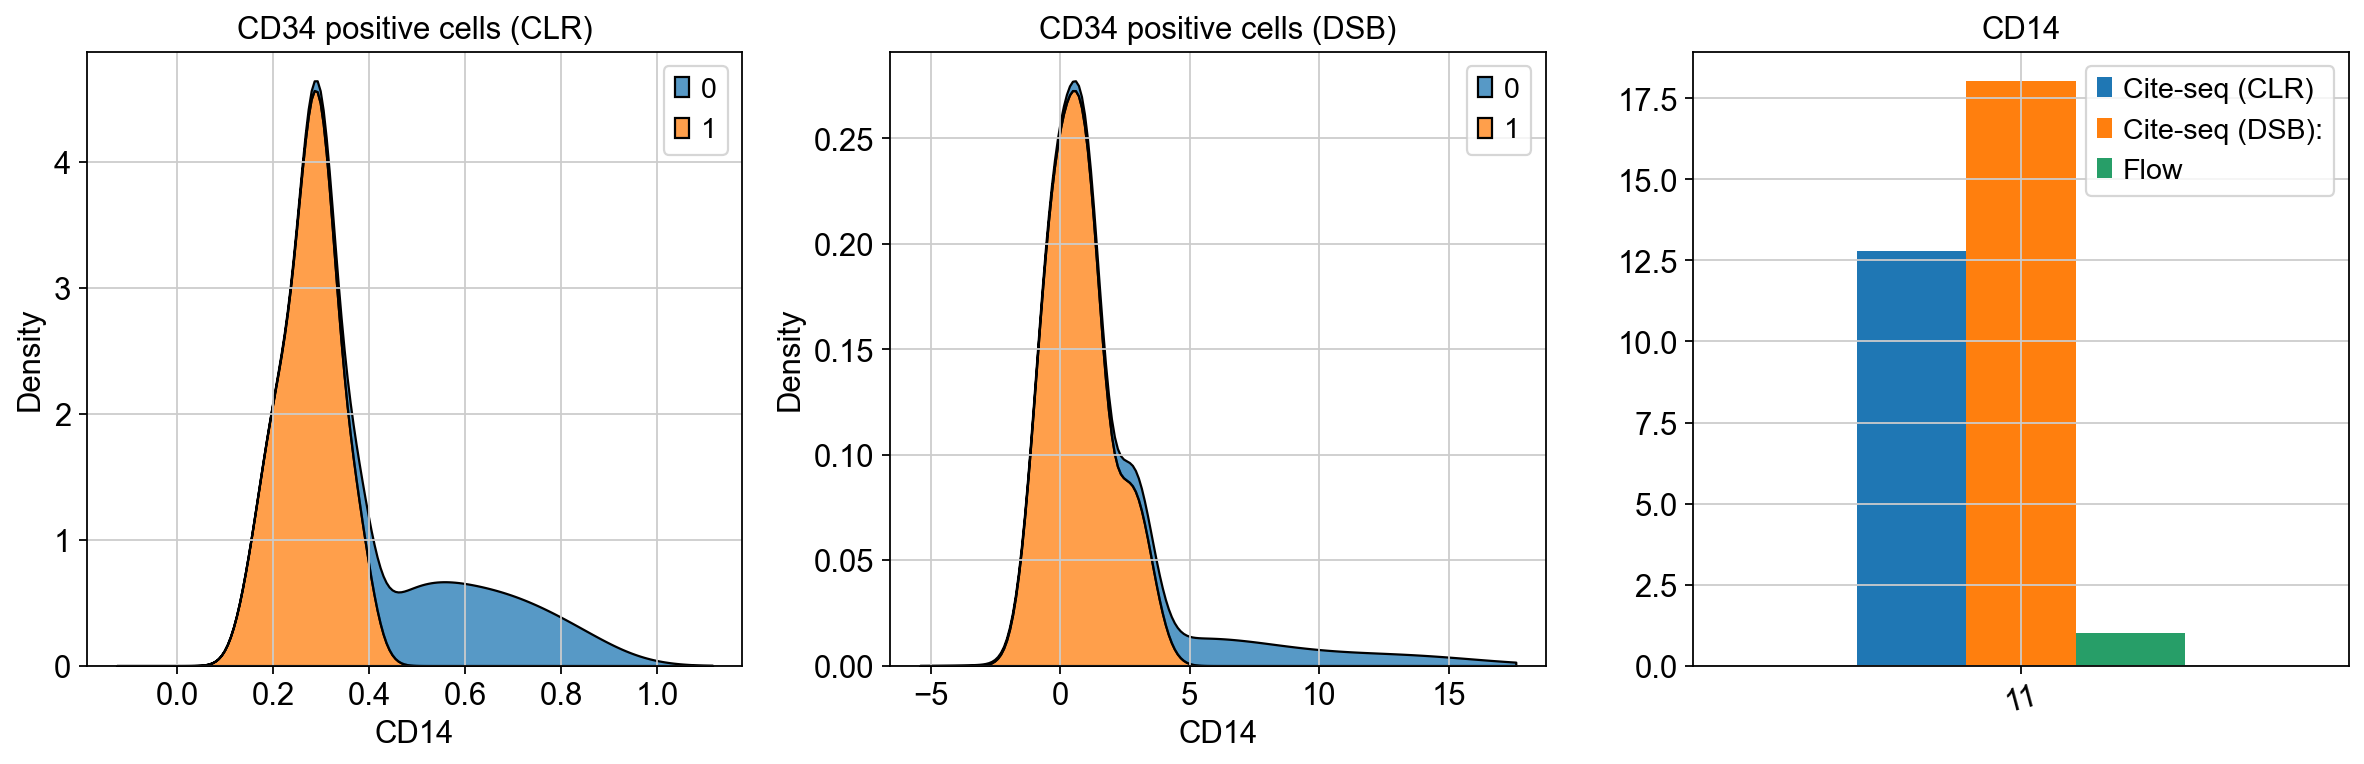

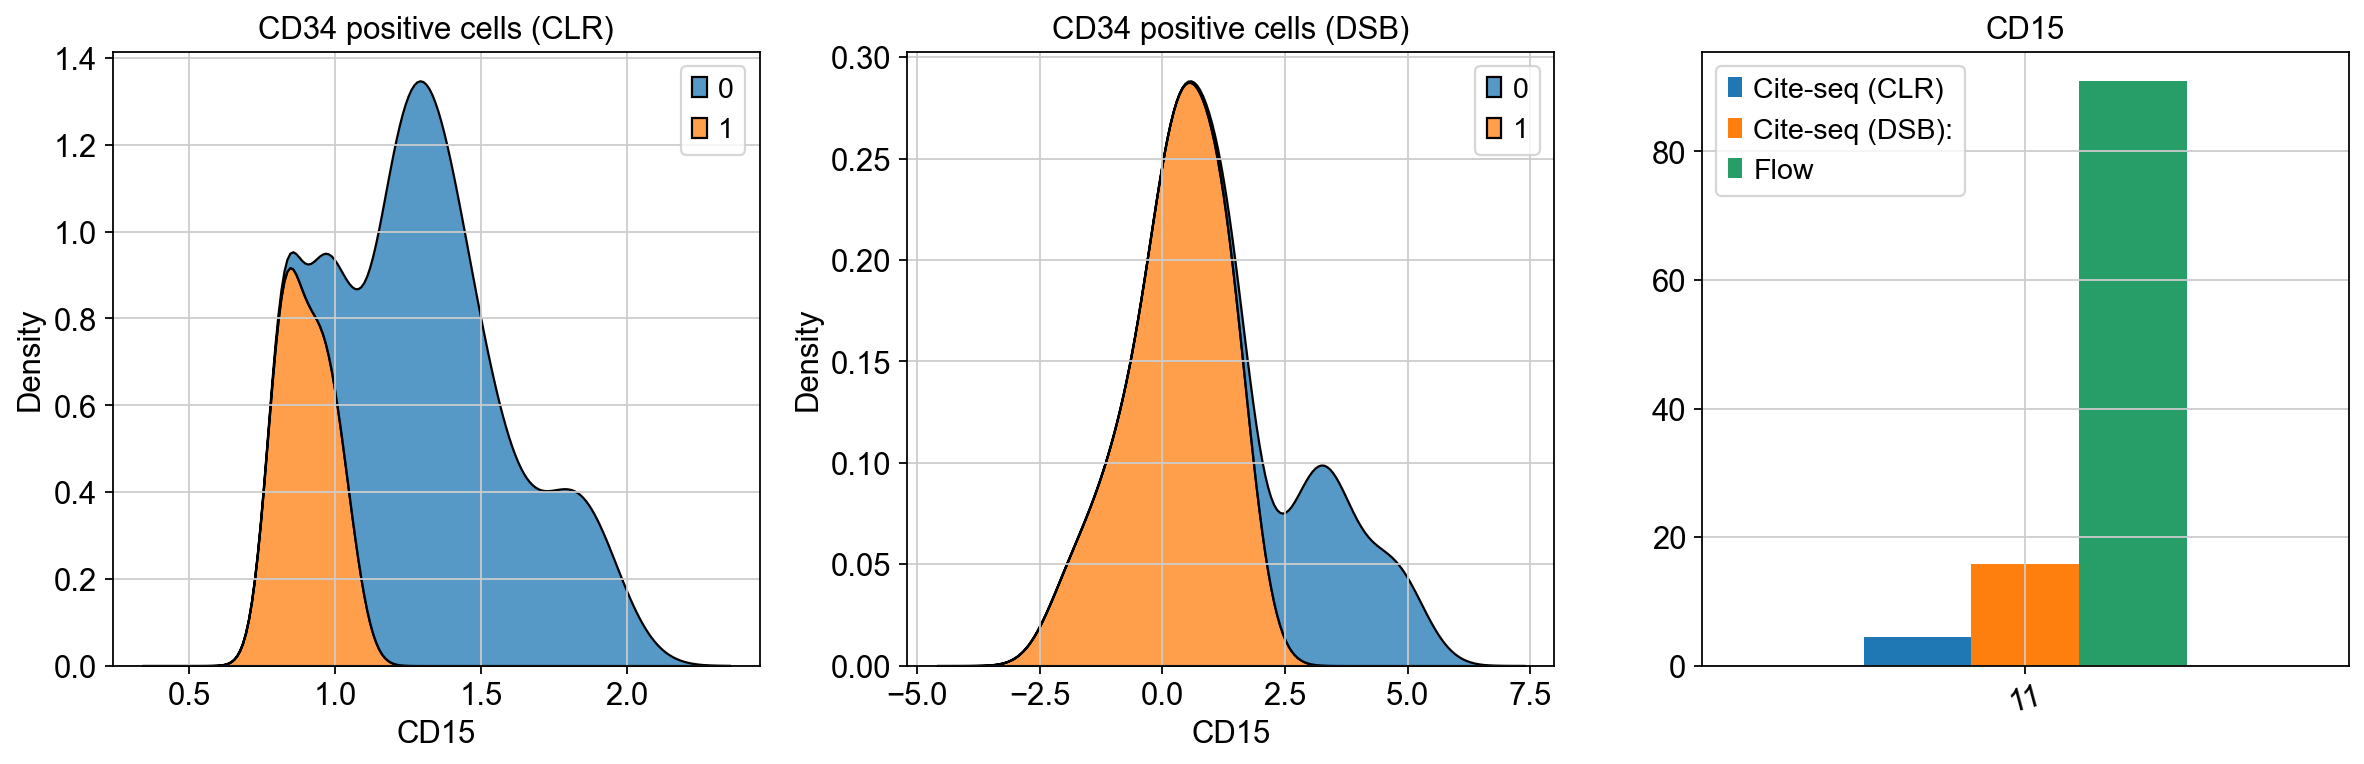

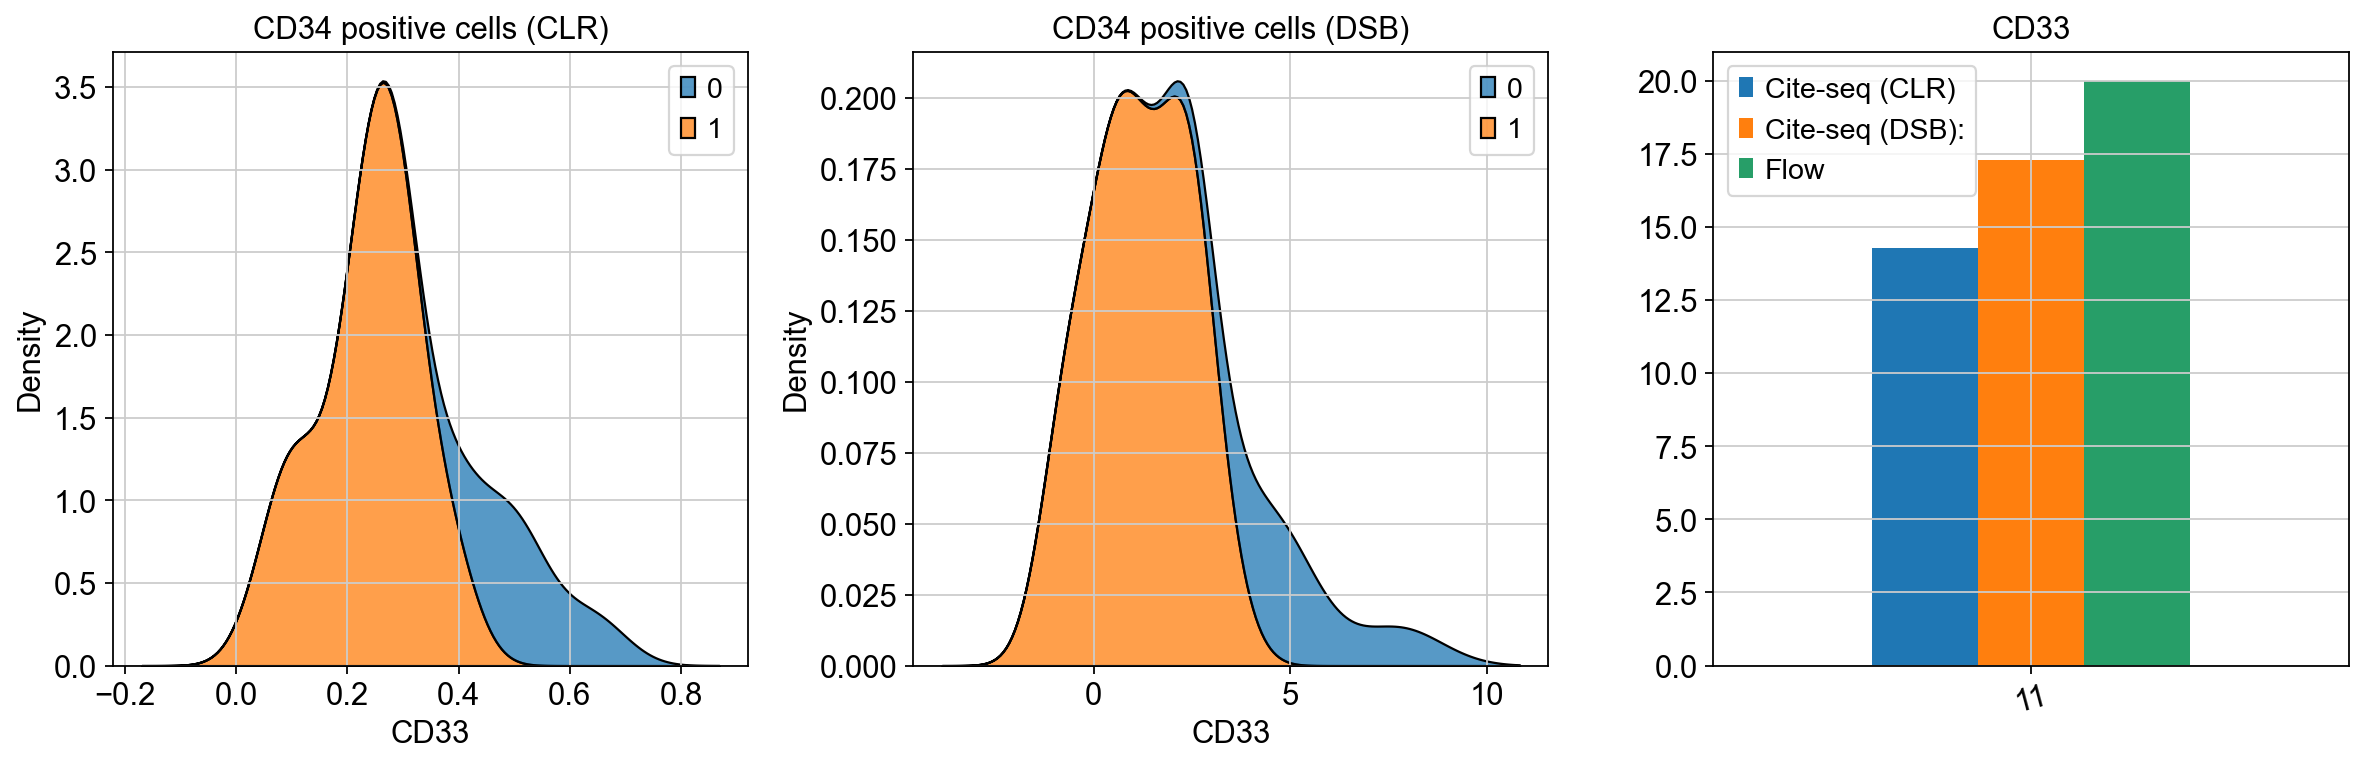

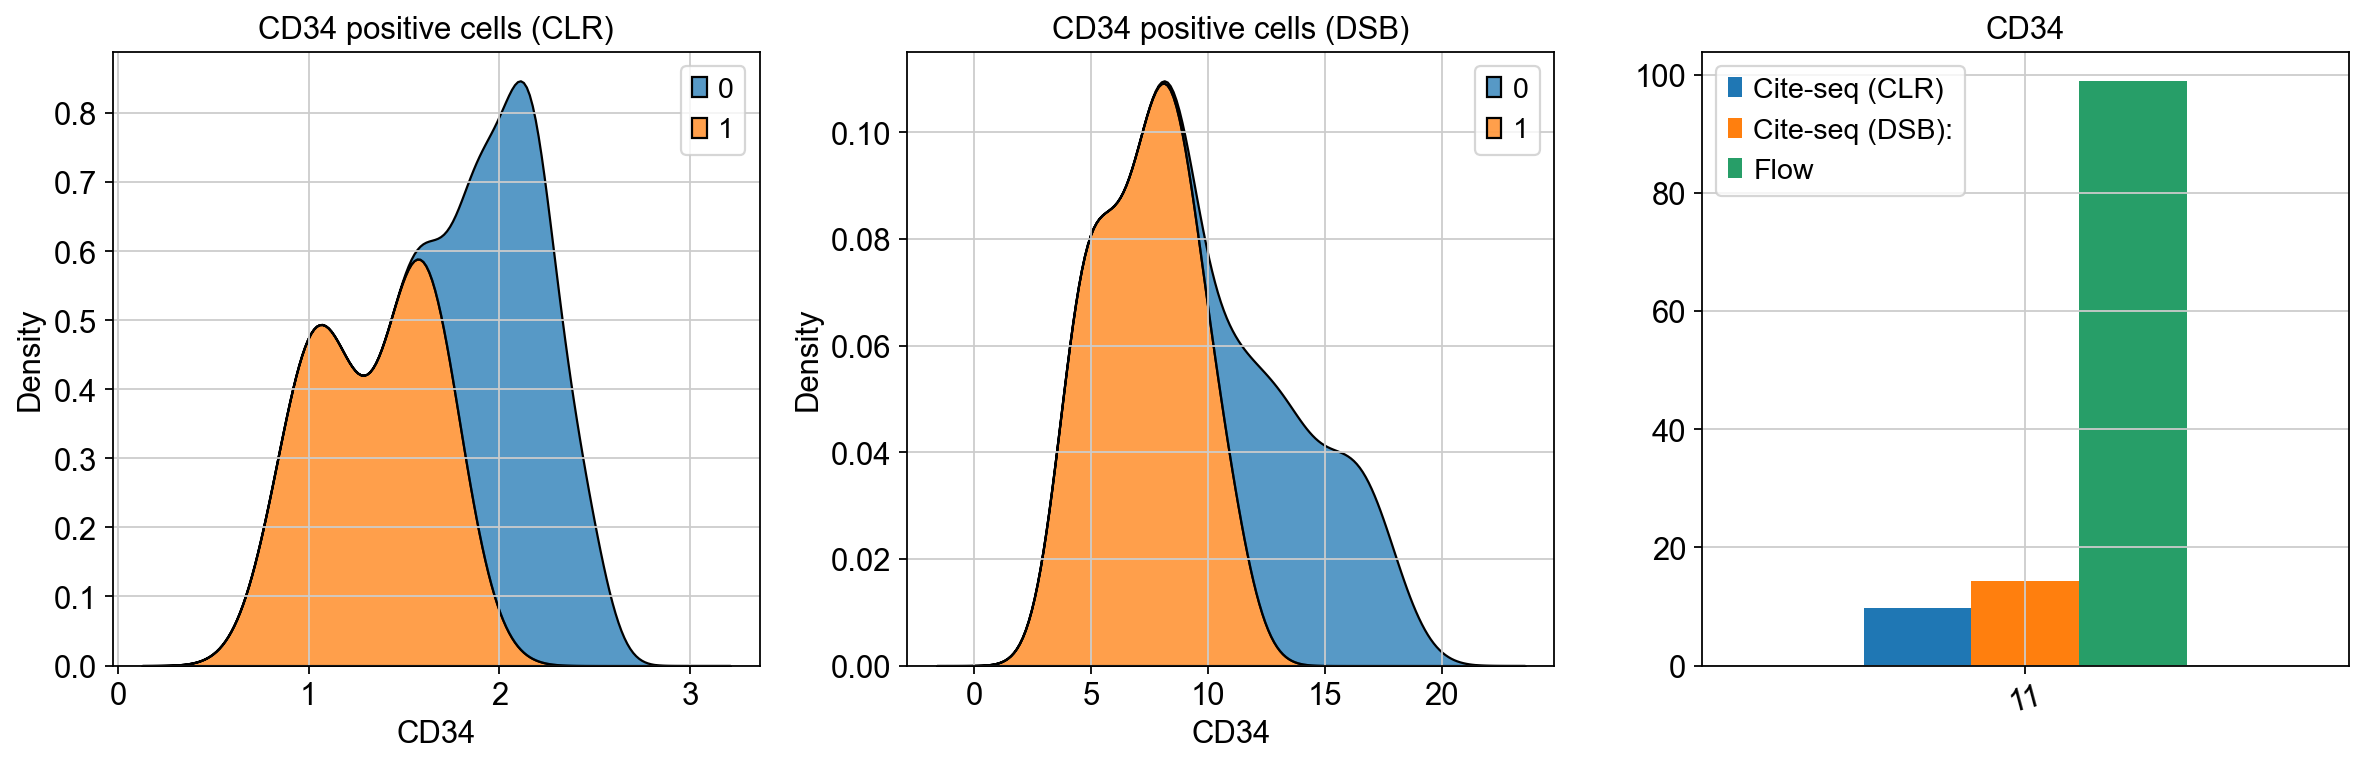

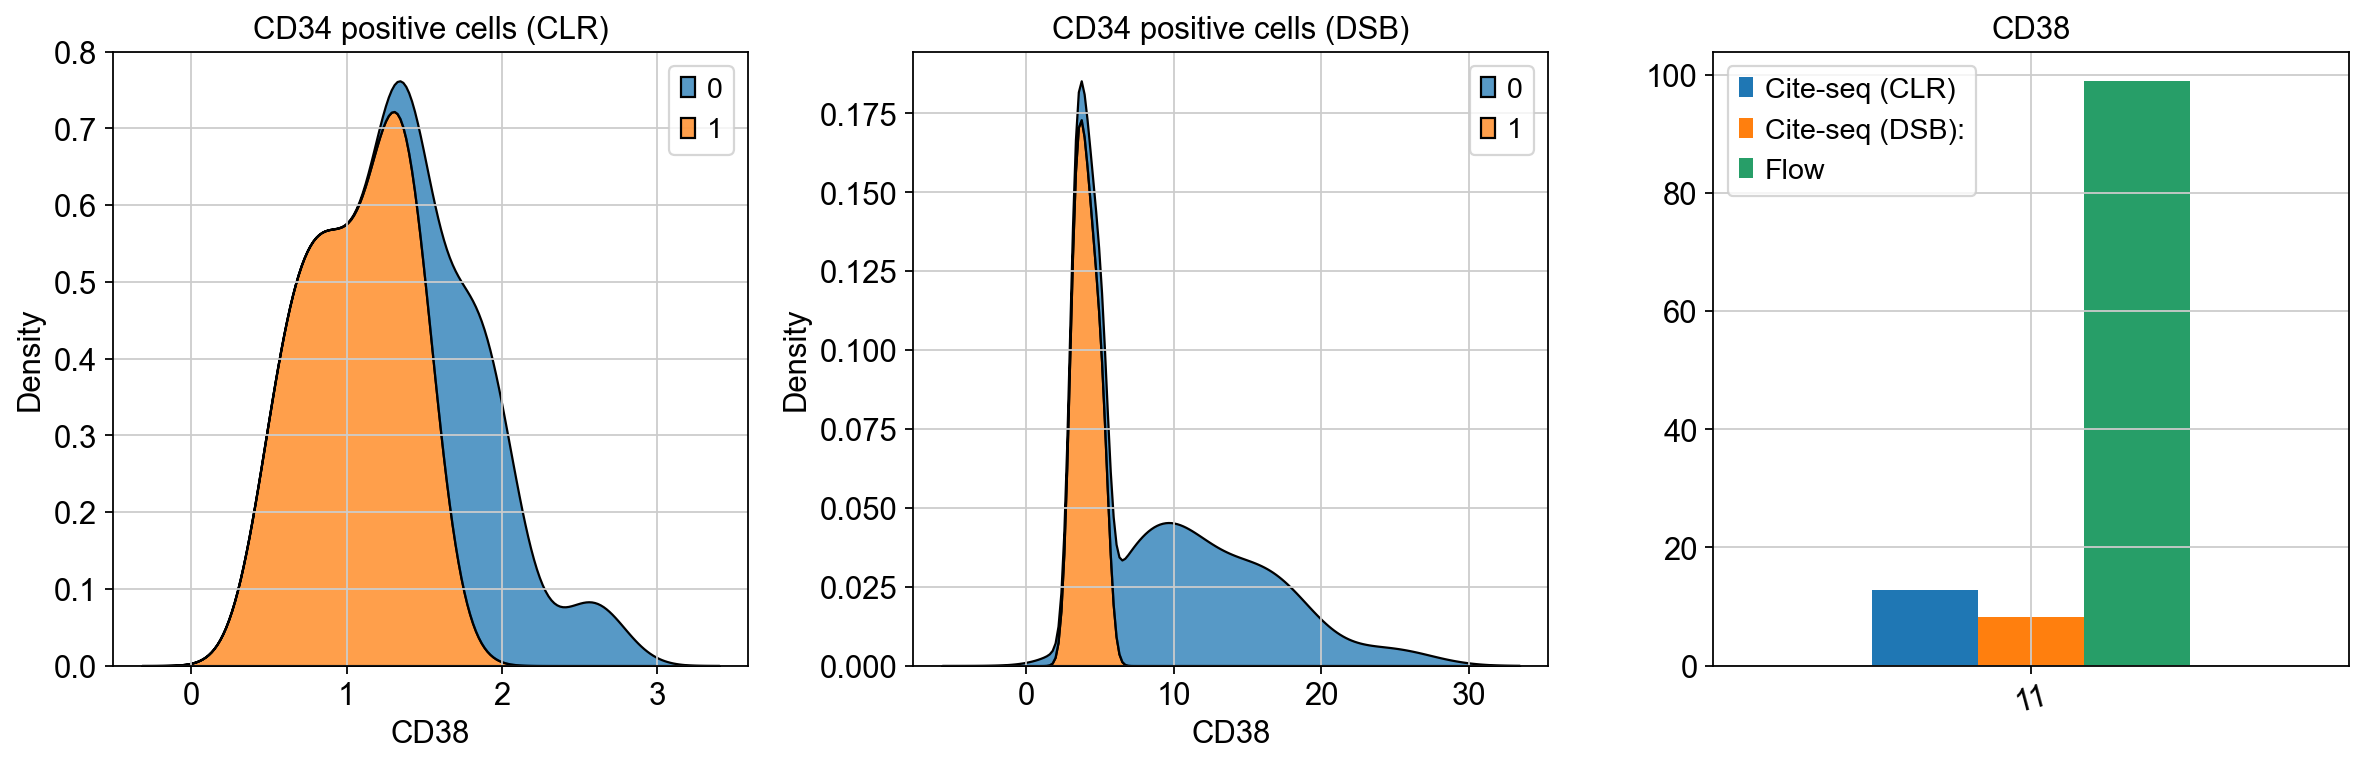

In [ ]:
#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
for column_name in column_names:
    fig, ax =plt.subplots(1,3,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    #CLR
    x_CLR= CD34pos_clr[column_name]
    x_CLR=x_CLR.values.reshape(-1, 1)
    gmm.fit(x_CLR)
    labels_CLR = gmm.predict(x_CLR)
    
    x0 = CD34pos_clr[column_name].reset_index(drop=True)[labels_CLR == 0].mean()
    x1 = CD34pos_clr[column_name].reset_index(drop=True)[labels_CLR == 1].mean()
    if x0 < x1:
        labels_CLR = (~(labels_CLR == 1)).astype(int)

    ax1 = sns.kdeplot(data=CD34pos_clr, x=column_name, hue=labels_CLR, multiple="stack", ax=ax[0]) ;
    
    #DSB
    x_DSB = CD34pos_dsb[column_name]
    x_DSB=x_DSB.values.reshape(-1, 1)
    gmm.fit(x_DSB)
    labels_DSB = gmm.predict(x_DSB)

    x0 = CD34pos_dsb[column_name].reset_index(drop=True)[labels_DSB == 0].mean()
    x1 = CD34pos_dsb[column_name].reset_index(drop=True)[labels_DSB == 1].mean()
    if x0 < x1:
        labels_DSB = (~(labels_DSB == 1)).astype(int)
    
    ax2 = sns.kdeplot(data=CD34pos_dsb, x=column_name, hue=labels_DSB, multiple="stack", color="g", ax=ax[1]) ;
        
    #Calculate zeros
    n_zeros1 = np.count_nonzero(labels_CLR==0)
    n_zeros2 = np.count_nonzero(labels_DSB==0)
    n_cells=len(eg1_dsb)
    result_zeros_CLR=(n_zeros1/n_cells * 100)
    result_zeros_DSB=(n_zeros2/n_cells * 100)
    #Calculate ones
    n_ones_CLR=np.count_nonzero(labels_CLR)
    n_ones_DSB=np.count_nonzero(labels_DSB)
    #percentages
    result_ones_CLR=(n_ones_CLR/n_cells * 100)
    result_ones_DSB=(n_ones_DSB/n_cells * 100)
    #Dataframes
    data_CLR = {"0s":[result_zeros_CLR],
        "1s":[result_ones_CLR]
        };

    dataFrame_CLR = pd.DataFrame(data=data_CLR)
    
    #combined
    
    all_data = {"Cite-seq (CLR)":[result_ones_CLR],
                "Cite-seq (DSB):":[result_ones_DSB],
        "Flow": eg1_nonulls[column_name],
        
        };

    all_data= pd.DataFrame(data=all_data);

    a3=all_data.plot.bar(rot=15, title=column_name,ax=ax[2]);
    
    ax1.title.set_text('CD34 positive cells (CLR)')   
    ax2.title.set_text('CD34 positive cells (DSB)')
    ax3.title.set_text('Flow vs CITE-seq')
    
    
    plt.show()

In [ ]:
#Here solution for the issue of the previous code. As we know that distribution closer 
#to 0 (left one) is the background and the right one represents the positive cells 
# => always the distribution with lower mean = 0, and with higher mean = 1. 


for column_name in column_names:
    fig, ax =plt.subplots(1,6,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    #Original density plots
    ax1 = sns.kdeplot(data=prot_CLR_norm, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=prot_norm, x=column_name, multiple="stack", color="g", ax=ax[1]) ;

    
    ax1.title.set_text('CLR')    #headings for subplots
    ax2.title.set_text('DSB')
    ax3.title.set_text('CLR')    #headings for subplots
    ax4.title.set_text('DSB')
    
    #CLR
    x_CLR= prot_CLR_norm[column_name]
    x_CLR=x_CLR.values.reshape(-1, 1)
    gmm.fit(x_CLR)
    labels_CLR = gmm.predict(x_CLR)
    labels_CLR = pd.Series(labels_CLR)
    
    x0 = prot_CLR_norm[column_name].reset_index(drop=True)[labels_CLR == 0].mean()
    x1 = prot_CLR_norm[column_name].reset_index(drop=True)[labels_CLR == 1].mean()
    if x0 < x1:
        labels_CLR = (~(labels_CLR == 1)).astype(int)

    ax3 = sns.kdeplot(data=prot_CLR_norm, x=column_name, hue=labels_CLR, multiple="stack", ax=ax[2]) ;

    #DSB
    x_DSB = prot_norm[column_name]
    x_DSB=x_DSB.values.reshape(-1, 1)
    gmm.fit(x_DSB)
    labels_DSB = gmm.predict(x_DSB)

    x0 = prot_norm[column_name].reset_index(drop=True)[labels_DSB == 0].mean()
    x1 = prot_norm[column_name].reset_index(drop=True)[labels_DSB == 1].mean()
    if x0 < x1:
        labels_DSB = (~(labels_DSB == 1)).astype(int)
    
    ax4 = sns.kdeplot(data=prot_norm, x=column_name, hue=labels_DSB, multiple="stack", color="g", ax=ax[3]) ;
    
    ax3.title.set_text('CLR')    #headings for subplots
    ax4.title.set_text('DSB')

    #Calculate zeros
    n_zeros1 = np.count_nonzero(labels_CLR==0)
    n_zeros2 = np.count_nonzero(labels_DSB==0)
    n_cells=labels1.shape
    result_zeros_CLR=(n_zeros1/6262 * 100)
    result_zeros_DSB=(n_zeros2/6262 * 100)
    #Calculate ones
    n_ones_CLR=np.count_nonzero(labels_CLR)
    n_ones_DSB=np.count_nonzero(labels_DSB)
    #percentages
    result_ones_CLR=(n_ones_CLR/6262 * 100)
    result_ones_DSB=(n_ones_DSB/6262 * 100)
    #Dataframes
    data_CLR = {"0s":[result_zeros_CLR],
        "1s":[result_ones_CLR]
        };

    dataFrame_CLR = pd.DataFrame(data=data_CLR)
    
    data_DSB = { "0s":[result_zeros_DSB],
        "1s":[result_ones_DSB]
        };
    dataFrame_DSB = pd.DataFrame(data=data_DSB)
    
    ax5= dataFrame_CLR.plot.bar(title=column_name, ax=ax[4]);
    ax6= dataFrame_DSB.plot.bar(title=column_name, ax=ax[5]);

    ax5.title.set_text('CLR')    #headings for subplots
    ax6.title.set_text('DSB')
    plt.show()

, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=prot_norm, x=column_name, multiple="stack", color="g", ax=ax[1]) ;

    
    ax1.title.set_text('CLR')    #headings for subplots
    ax2.title.set_text('DSB')
    ax3.title.set_text('CLR')    #headings for subplots
    ax4.title.set_text('DSB')
    
    #CLR
    x_CLR= prot_CLR_norm[column_name]
    x_CLR=x_CLR.values.reshape(-1, 1)
    gmm.fit(x_CLR)
    labels_CLR = gmm.predict(x_CLR)
    labels_CLR = pd.Series(labels_CLR)
    
    x0 = prot_CLR_norm[column_name].reset_index(drop=True)[labels_CLR == 0].mean()
    x1 = prot_CLR_norm[column_name].reset_index(drop=True)[labels_CLR == 1].mean()
    if x0 < x1:
        labels_CLR = (~(labels_CLR == 1)).astype(int)

    ax3 = sns.kdeplot(data=prot_CLR_norm, x=column_name, hue=labels_CLR, multiple="stack", ax=ax[2]) ;

    #DSB
    x_DSB = prot_norm[column_name]
    x_DSB=x_DSB.values.reshape(-1, 1)
    gmm.fit(x_DSB)
    labels_DSB = gmm.predict(x_DSB)

    x0 = prot_norm[column_name].reset_index(drop=True)[labels_DSB == 0].mean()
    x1 = prot_norm[column_name].reset_index(drop=True)[labels_DSB == 1].mean()
    if x0 < x1:
        labels_DSB = (~(labels_DSB == 1)).astype(int)
    
    ax4 = sns.kdeplot(data=prot_norm, x=column_name, hue=labels_DSB, multiple="stack", color="g", ax=ax[3]) ;
    
    ax3.title.set_text('CLR')    #headings for subplots
    ax4.title.set_text('DSB')

    #Calculate zeros
    n_zeros1 = np.count_nonzero(labels_CLR==0)
    n_zeros2 = np.count_nonzero(labels_DSB==0)
    n_cells=labels1.shape
    result_zeros_CLR=(n_zeros1/6262 * 100)
    result_zeros_DSB=(n_zeros2/6262 * 100)
    #Calculate ones
    n_ones_CLR=np.count_nonzero(labels_CLR)
    n_ones_DSB=np.count_nonzero(labels_DSB)
    #percentages
    result_ones_CLR=(n_ones_CLR/6262 * 100)
    result_ones_DSB=(n_ones_DSB/6262 * 100)
    #Dataframes
    data_CLR = {"0s":[result_zeros_CLR],
        "1s":[result_ones_CLR]
        };

    dataFrame_CLR = pd.DataFrame(data=data_CLR)
    
    data_DSB = { "0s":[result_zeros_DSB],
        "1s":[result_ones_DSB]
        };
    dataFrame_DSB = pd.DataFrame(data=data_DSB)
    
    ax5= dataFrame_CLR.plot.bar(title=column_name, ax=ax[4]);
    ax6= dataFrame_DSB.plot.bar(title=column_name, ax=ax[5]);

    ax5.title.set_text('CLR')    #headings for subplots
    ax6.title.set_text('DSB')
    plt.show()

